## Healthcate Dataeset - exploratory data analysis
* Author : Ahmed Essam
* date : 9/8/2025
### introduction :-
- in the project ,we analyze a healthcate dataeset containing patient demographics , medical conditions , billing information and rest results
- the goal is to uncover trends , detect anomalies and identify relationships between differnt attributes such as age , gender , admission type and billing amount

In [16]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [17]:
# loading data from a CSV file
data = pd.read_csv('D:\\dataAnalysisPython\\test\\pro1\\healthcare_dataset.csv')
# display the first five rows
data.head(5)

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


In [18]:
# some information about the table
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55500 non-null  object 
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  object 
 12  Discharge Date      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test Results        55500 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 6.4

In [19]:
# statistical summary of the table
print(data.describe())

                Age  Billing Amount   Room Number
count  55500.000000    55500.000000  55500.000000
mean      51.539459    25539.316097    301.134829
std       19.602454    14211.454431    115.243069
min       13.000000    -2008.492140    101.000000
25%       35.000000    13241.224652    202.000000
50%       52.000000    25538.069376    302.000000
75%       68.000000    37820.508436    401.000000
max       89.000000    52764.276736    500.000000


In [20]:
# to find missing data
print(data.isnull().sum())

Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64


In [30]:
data.duplicated().sum()
data = data.drop_duplicates()

count outliers Age
0


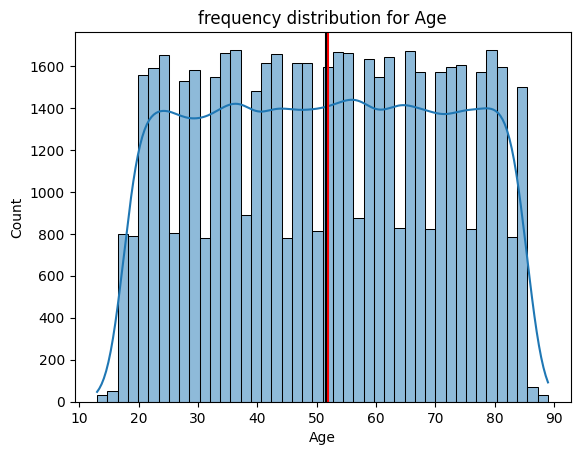

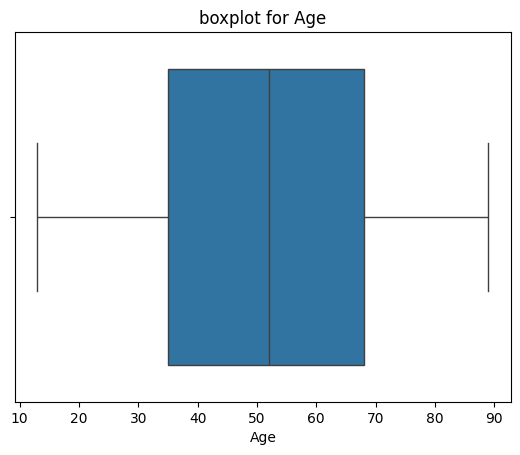

count outliers Billing Amount
0


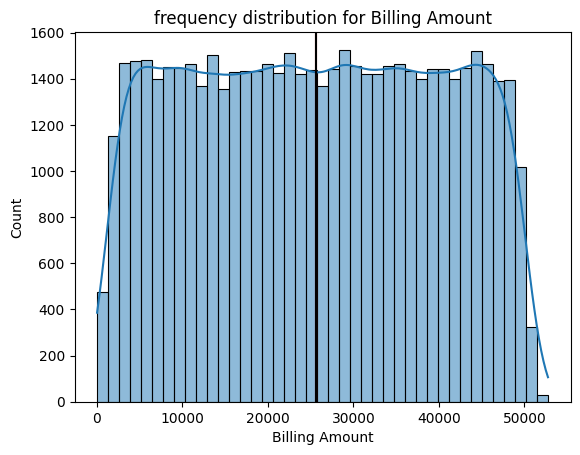

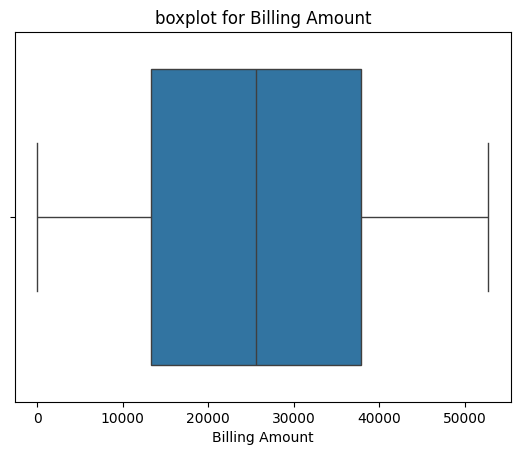

In [31]:
cols = ['Age' , 'Billing Amount']
data = data[data['Billing Amount'] >= 0]
# a function for identifying outliers
def detect_outliers(col):
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    iqr = q3 - q1
    lb = q1 - iqr * 1.5
    ub = q3 + iqr * 1.5
    outliers = data[(data[col] < lb) | (data[col] > ub)]
    print(f'count outliers {col}')
    print(len(outliers))
def plot_distribution(col):
    # frequency distribution chart
    sns.histplot(data = data , x = col ,kde=True)
    plt.axvline(data[col].median() , color = 'red')
    plt.axvline(data[col].mean() , color = 'black')
    plt.title(f'frequency distribution for {col}')
    plt.show()
    # Box-plot
    sns.boxplot(data = data , x= col)
    plt.title(f'boxplot for {col}')
    plt.show()
for col in cols :
    detect_outliers(col)
    plot_distribution(col)

In [23]:
# Convert the 'Date of Admission' column to datetime and add columns for admission days, months, and years
data['Date of Admission'] = pd.to_datetime(data['Date of Admission'])
data['day_Admission'] = data['Date of Admission'].dt.day
data['month_Admission'] = data['Date of Admission'].dt.month
data['year_Admission'] = data['Date of Admission'].dt.year
data['week_Admission'] = data['Date of Admission'].dt.day_name()
# Convert the 'Discharge Date' column to datetime and add columns for discharge days, months, and years
data['Discharge Date'] = pd.to_datetime(data['Discharge Date'])
data['day_Discharge'] = data['Discharge Date'].dt.day
data['month_Discharge'] = data['Discharge Date'].dt.month
data['year_Discharge'] = data['Discharge Date'].dt.year
data['week_Discharge'] = data['Discharge Date'].dt.day_name()

count Gender : 
 Gender
Female    27411
Male      27449
Name: count, dtype: int64


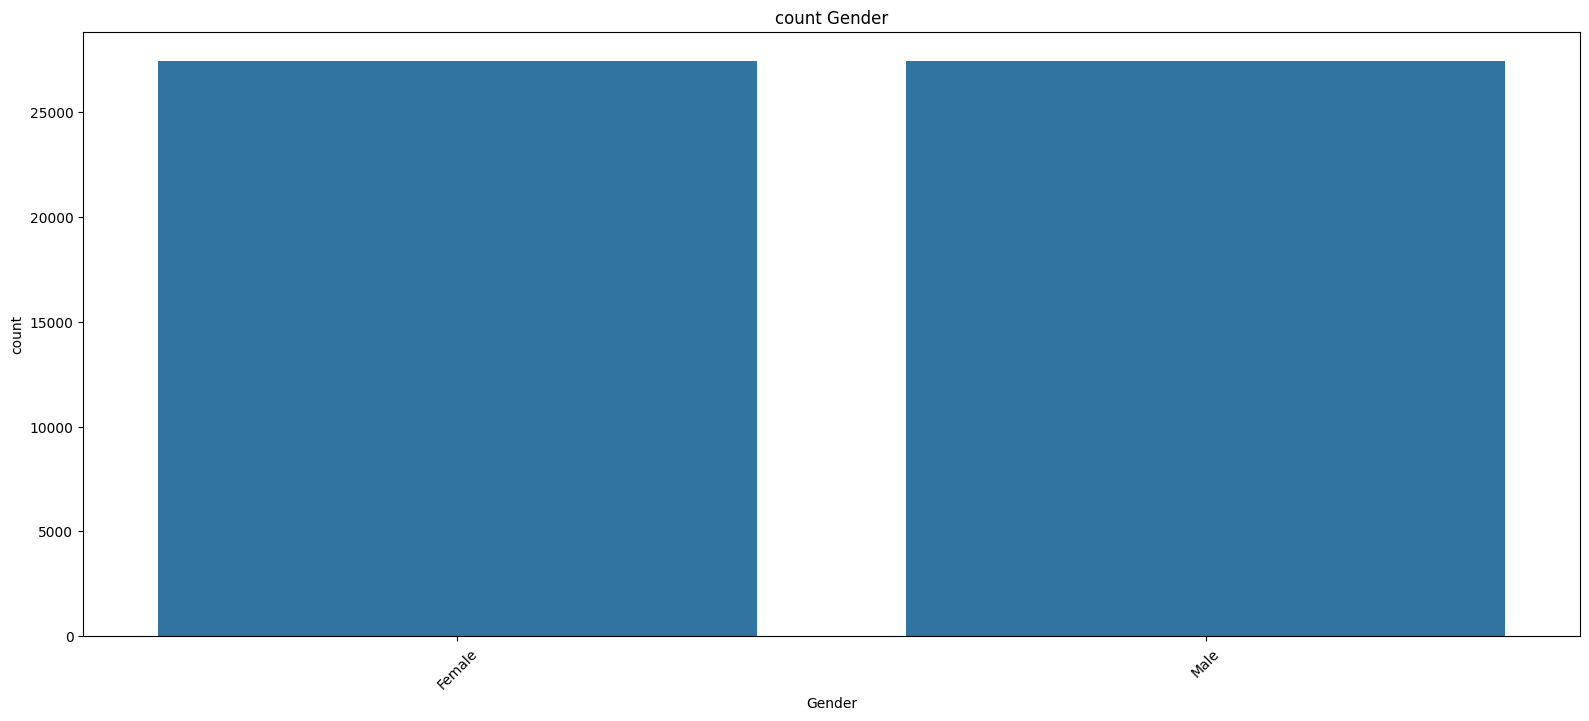

count Blood Type : 
 Blood Type
O-     6788
O+     6843
AB-    6859
B-     6861
AB+    6872
B+     6876
A+     6879
A-     6882
Name: count, dtype: int64


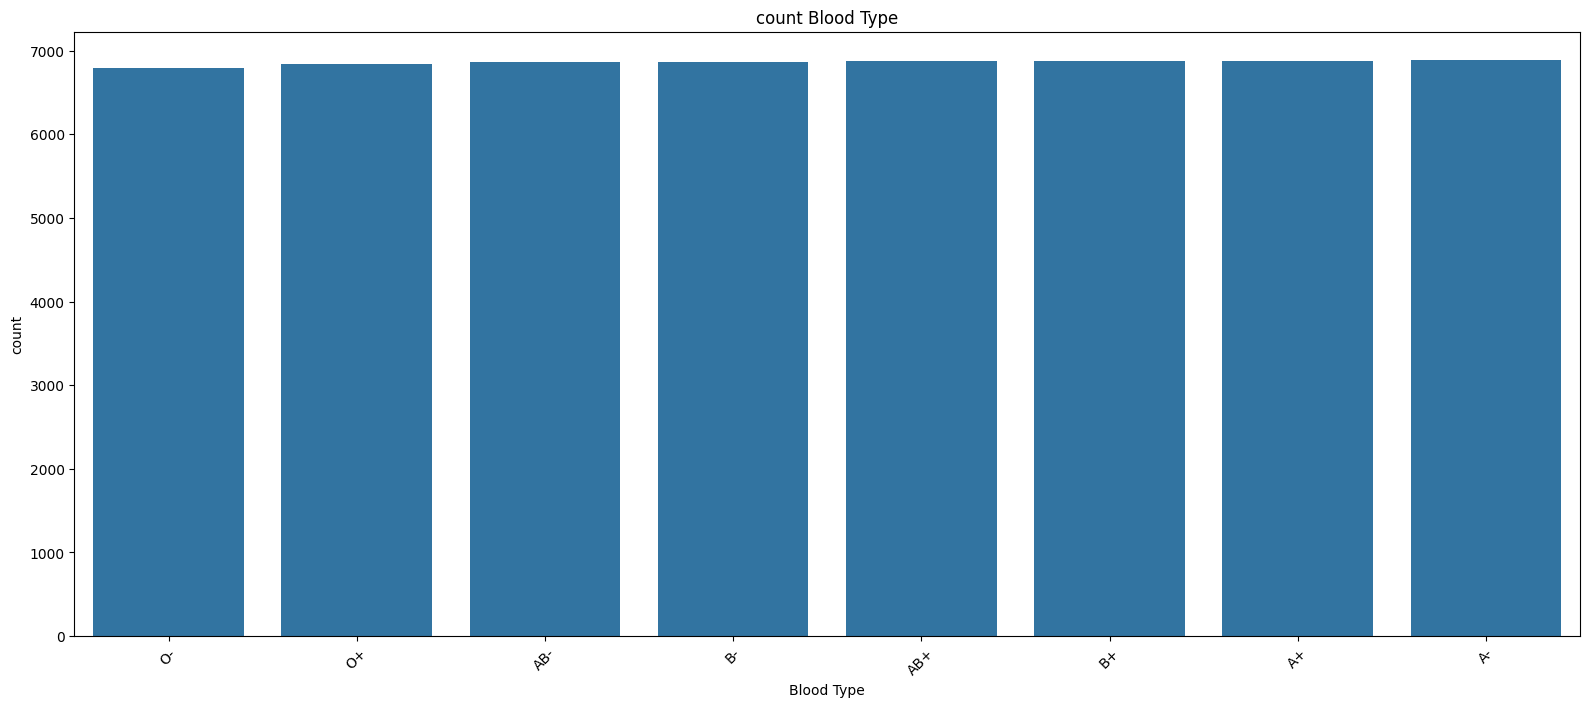

count Medical Condition : 
 Medical Condition
Asthma          9077
Cancer          9121
Obesity         9127
Hypertension    9131
Diabetes        9197
Arthritis       9207
Name: count, dtype: int64


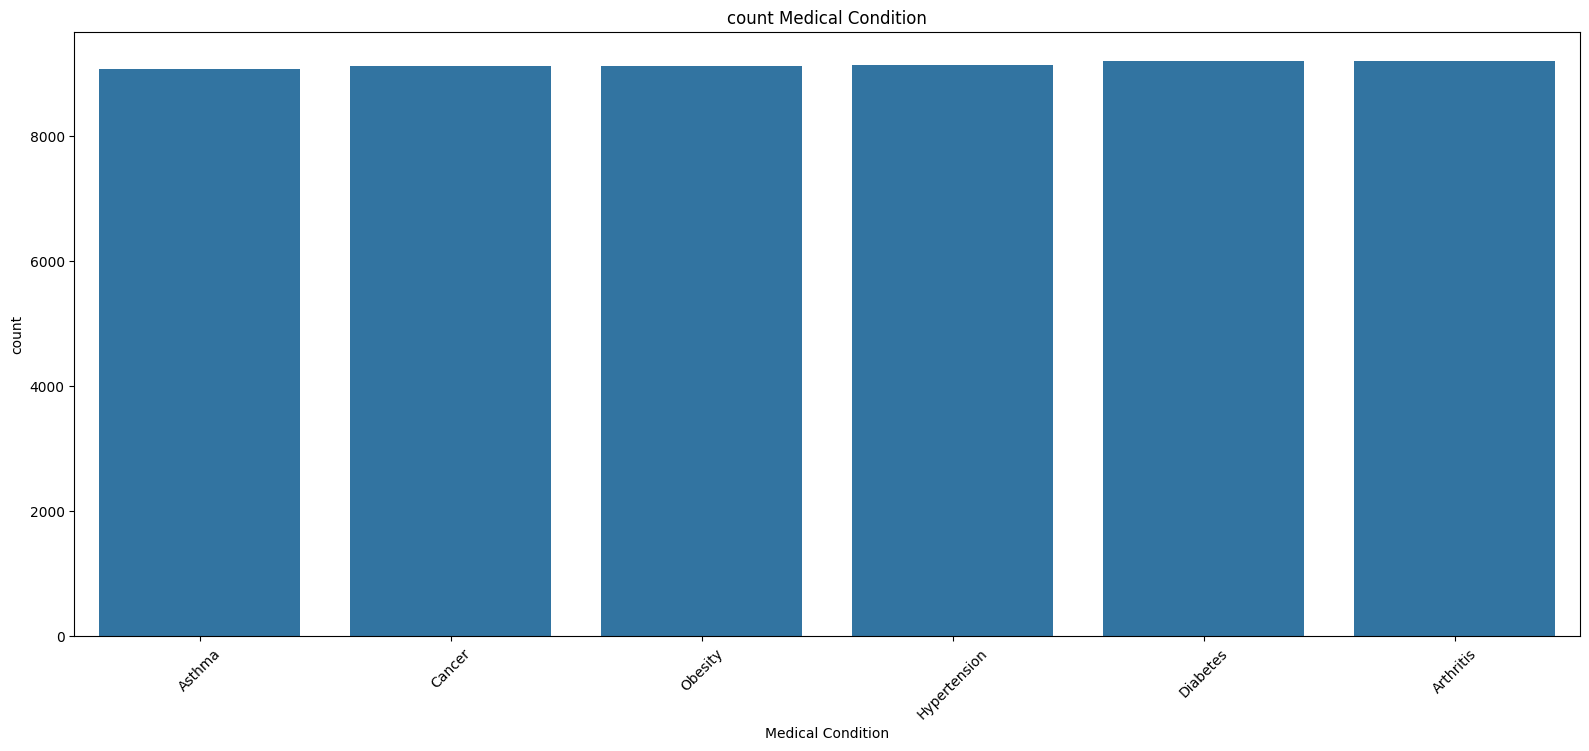

count Insurance Provider : 
 Insurance Provider
Aetna               10795
Blue Cross          10937
UnitedHealthcare    10995
Medicare            11018
Cigna               11115
Name: count, dtype: int64


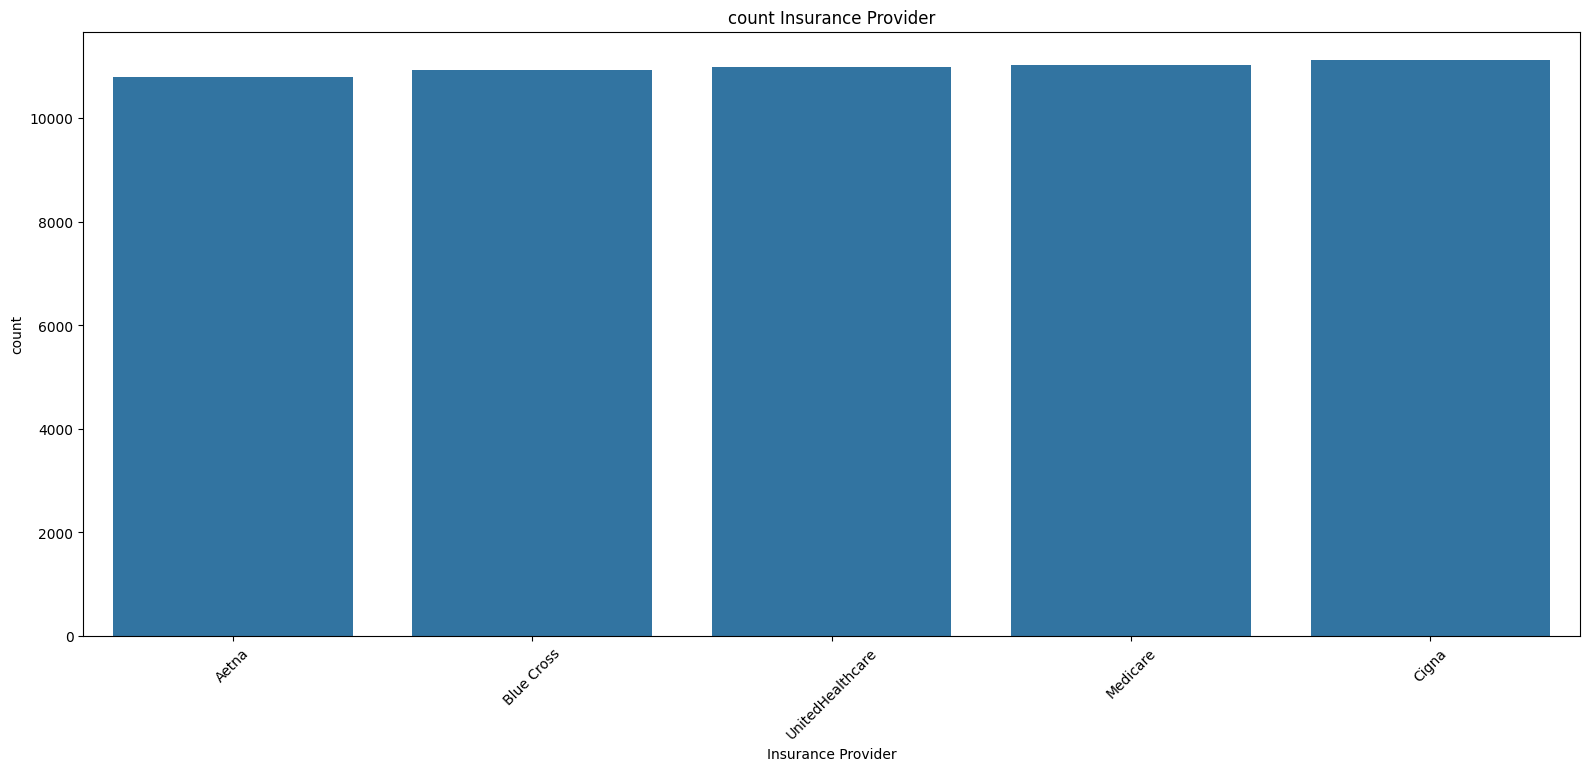

count Admission Type : 
 Admission Type
Emergency    18070
Urgent       18353
Elective     18437
Name: count, dtype: int64


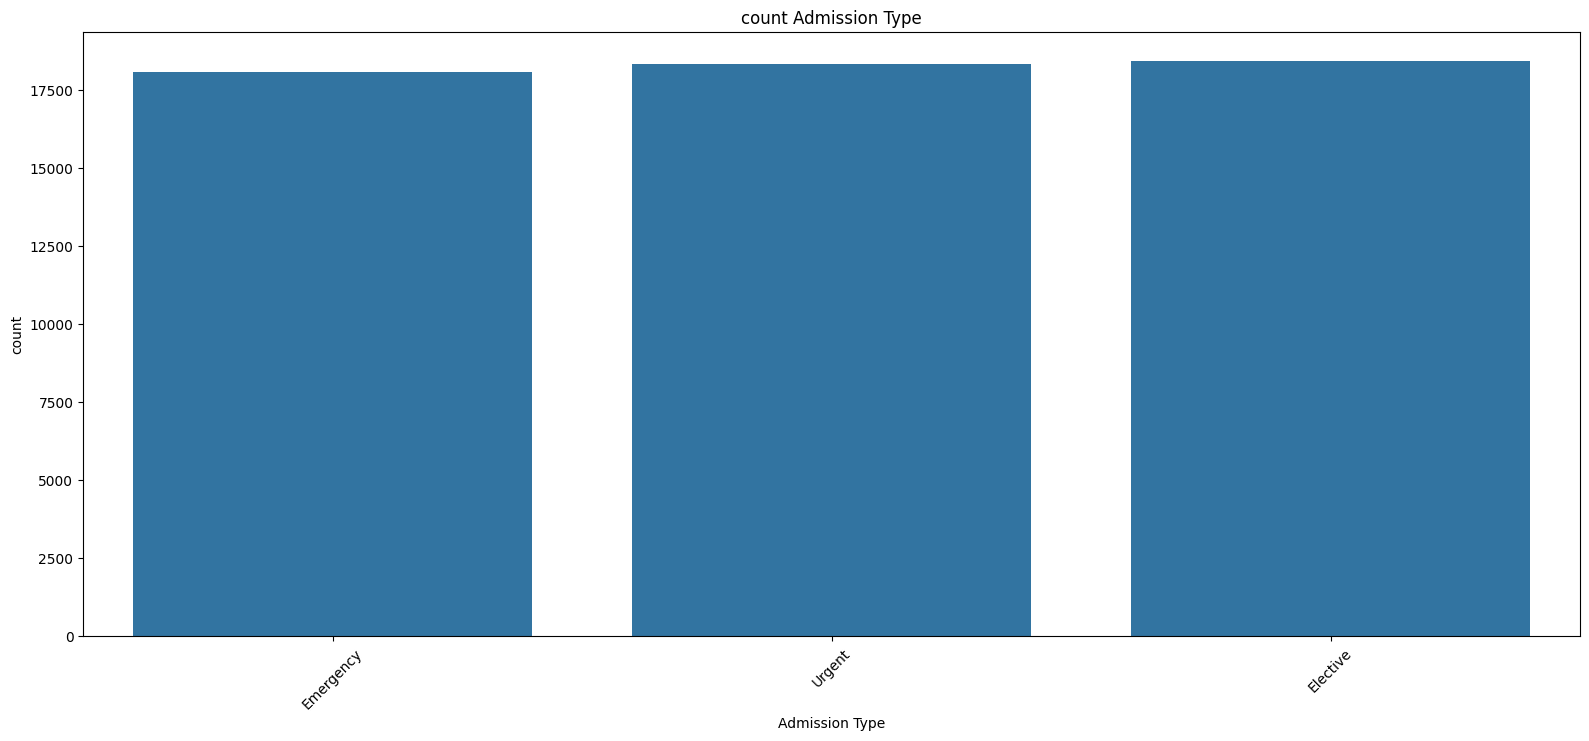

count Medication : 
 Medication
Penicillin     10932
Paracetamol    10945
Aspirin        10963
Ibuprofen      11002
Lipitor        11018
Name: count, dtype: int64


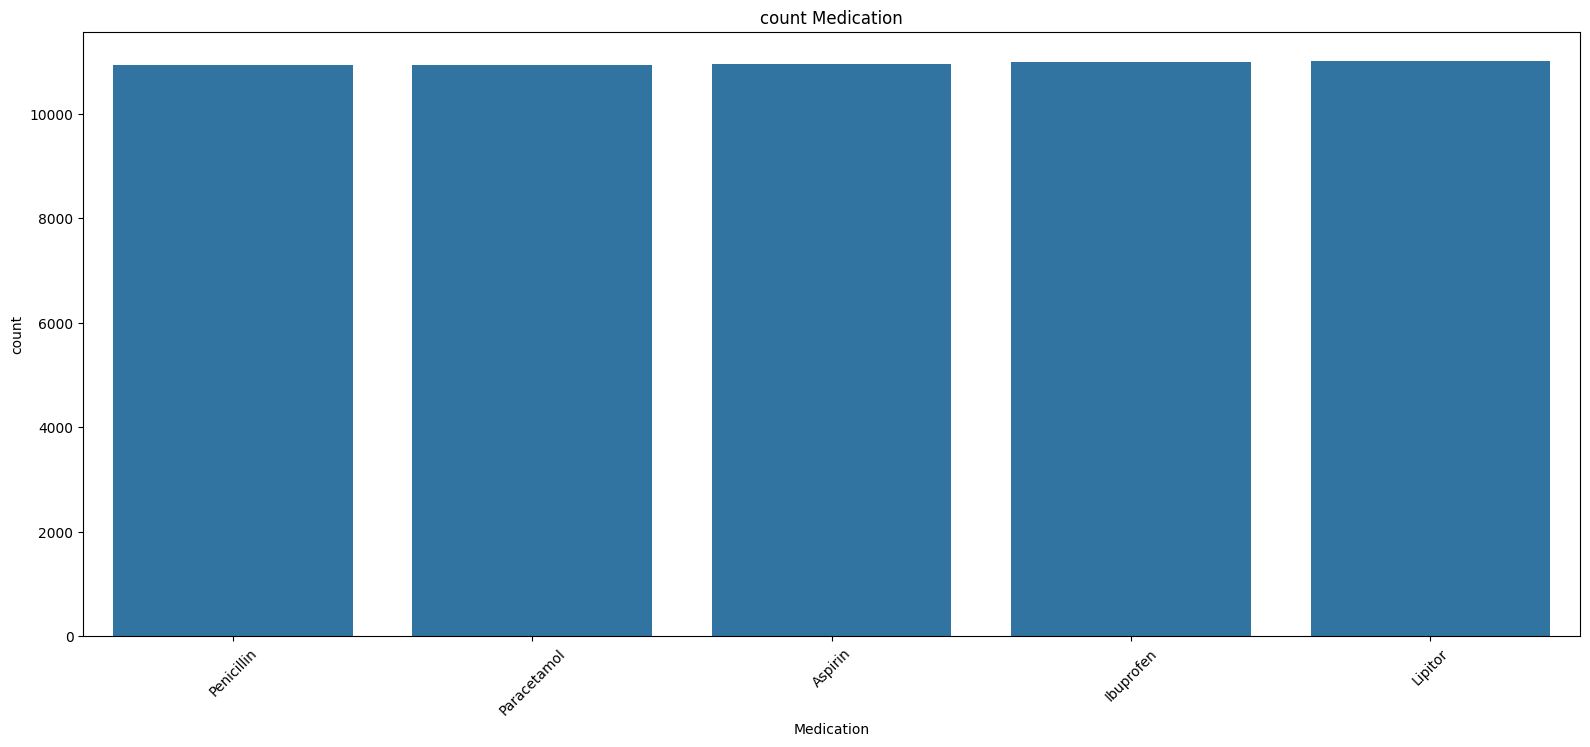

count Test Results : 
 Test Results
Inconclusive    18159
Normal          18302
Abnormal        18399
Name: count, dtype: int64


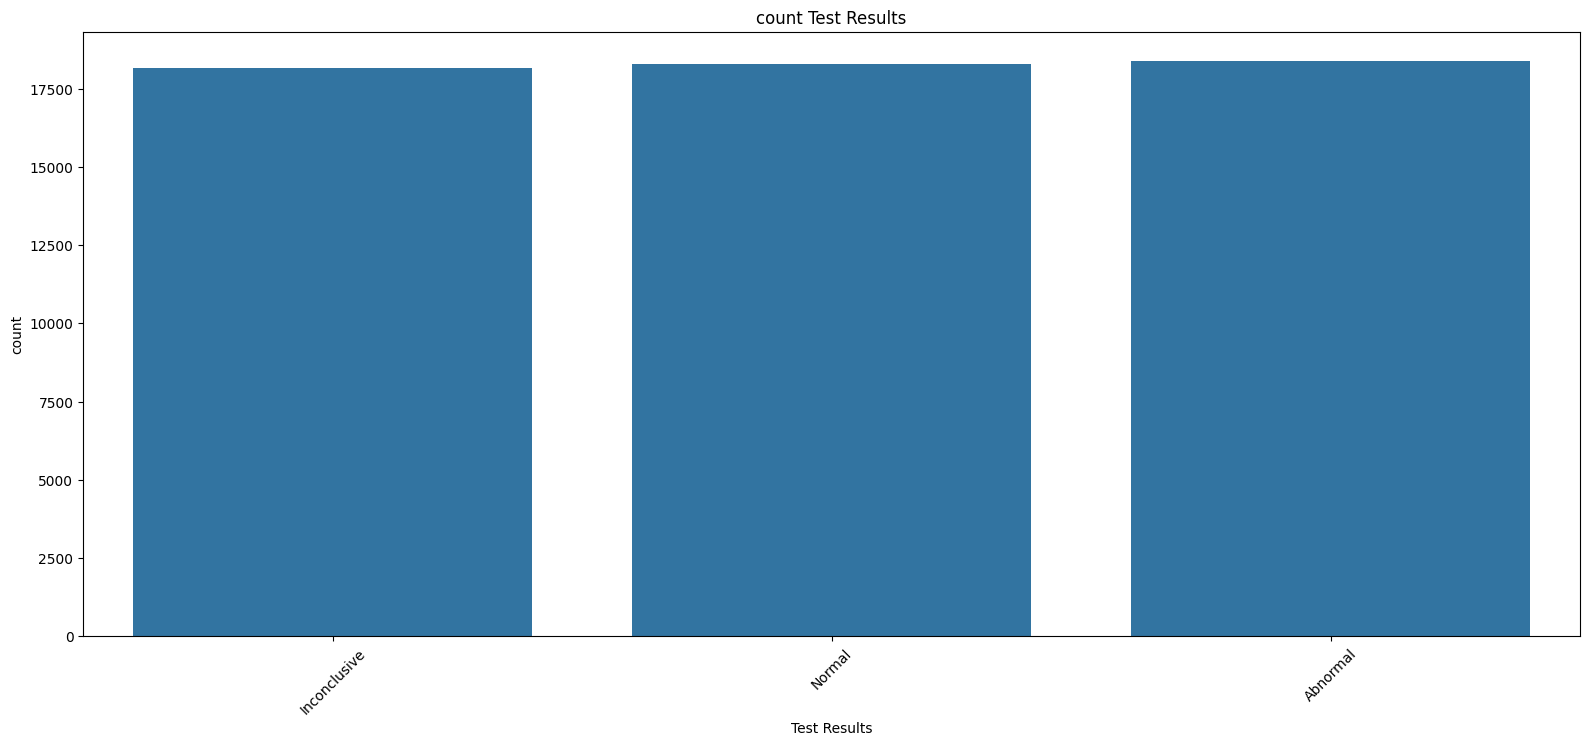

count day_Admission : 
 day_Admission
31    1013
30    1669
11    1681
29    1695
17    1717
18    1741
23    1746
14    1758
26    1760
2     1761
19    1767
4     1779
28    1781
15    1788
27    1794
22    1796
16    1800
10    1813
12    1815
6     1818
25    1822
5     1829
20    1830
7     1840
9     1842
13    1849
8     1851
21    1855
1     1862
24    1881
3     1907
Name: count, dtype: int64


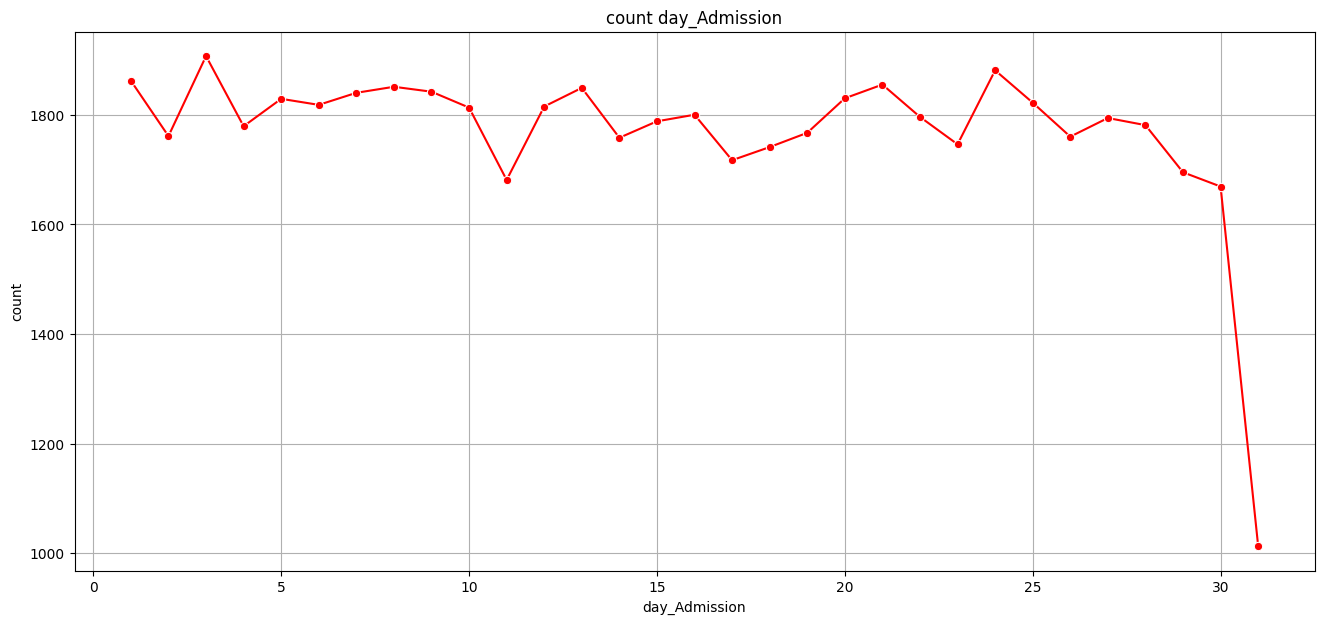

count month_Admission : 
 month_Admission
2     4199
4     4466
11    4501
9     4503
5     4547
12    4604
10    4605
3     4610
6     4640
1     4646
7     4762
8     4777
Name: count, dtype: int64


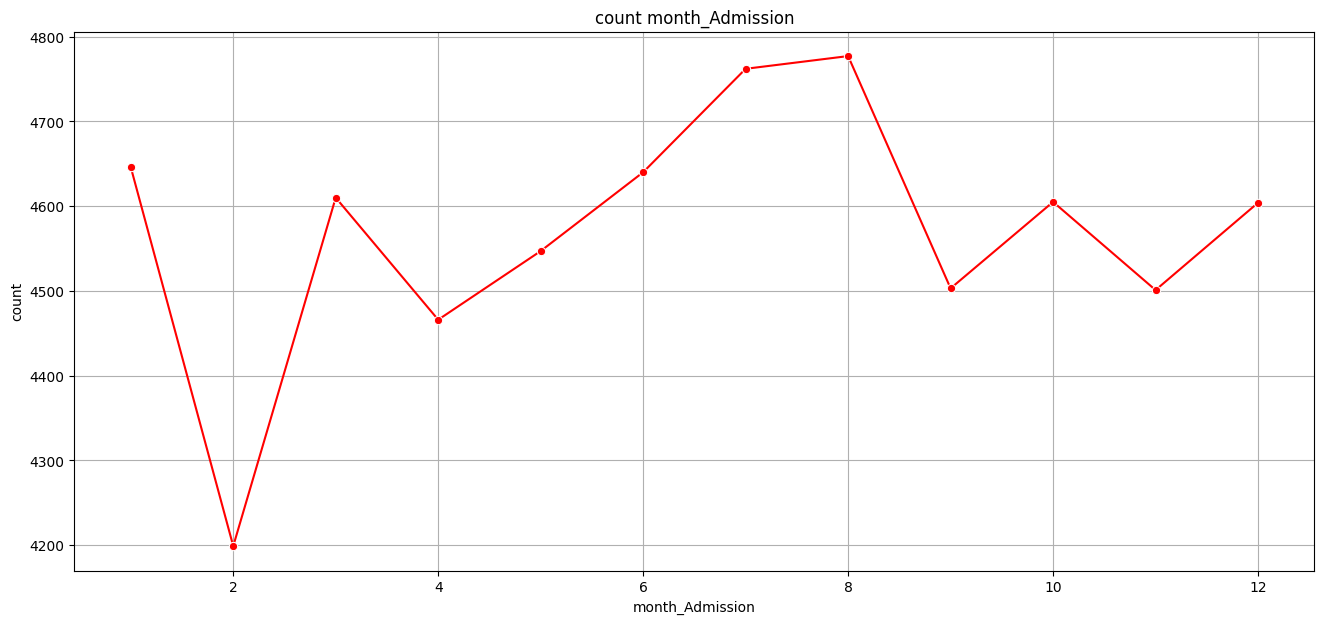

count year_Admission : 
 year_Admission
2024     3819
2019     7280
2021    10795
2022    10891
2023    10918
2020    11157
Name: count, dtype: int64


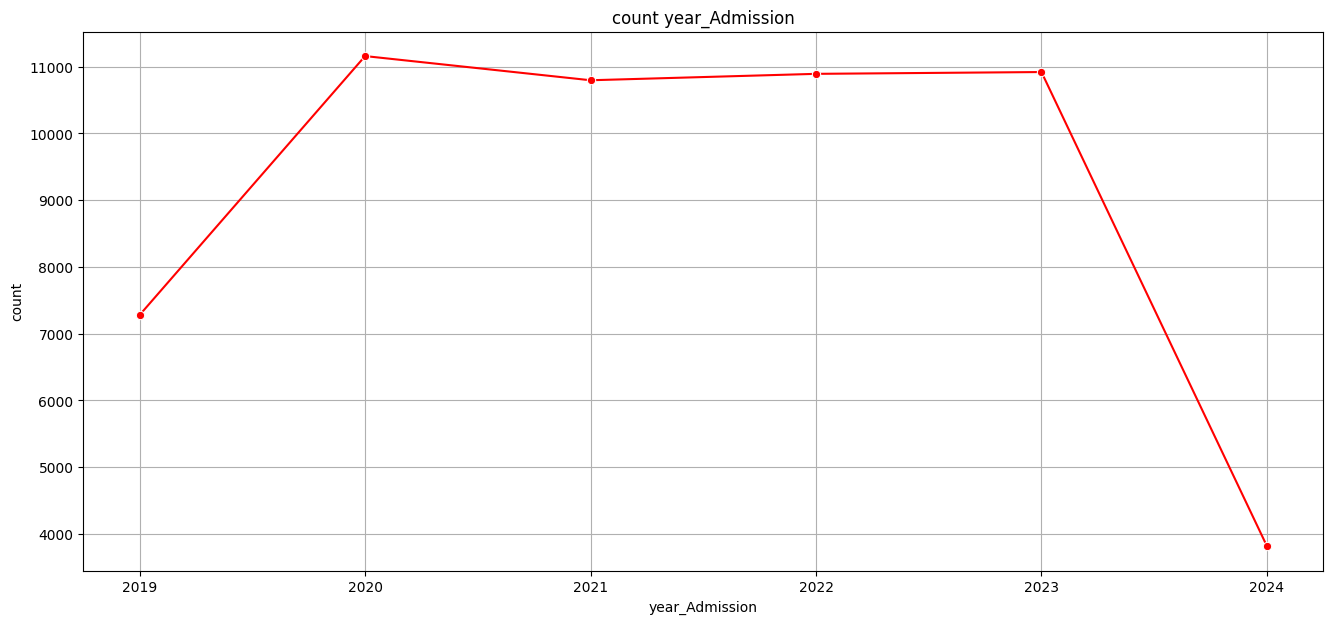

count week_Admission : 
 week_Admission
Monday       7762
Friday       7802
Saturday     7809
Sunday       7839
Wednesday    7859
Thursday     7893
Tuesday      7896
Name: count, dtype: int64


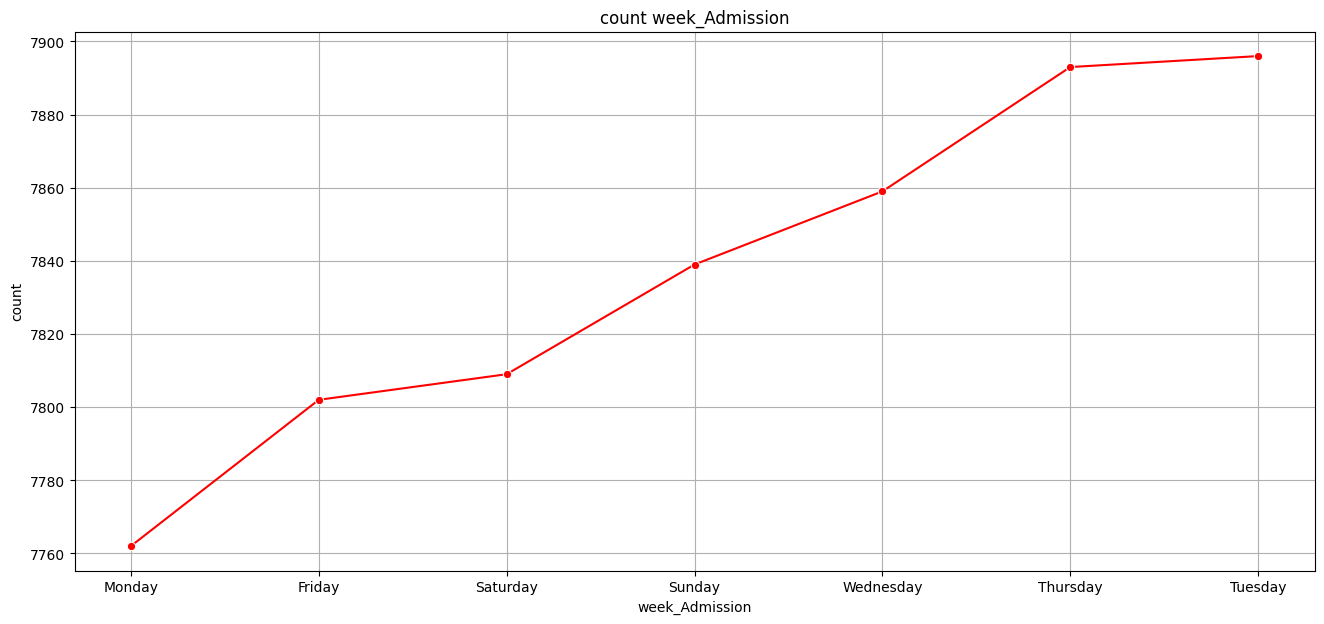

count day_Discharge : 
 day_Discharge
31    1011
2     1614
30    1614
29    1638
10    1733
16    1775
8     1777
6     1780
9     1782
11    1787
19    1790
4     1795
14    1796
17    1799
1     1800
23    1802
26    1807
25    1809
18    1820
13    1835
20    1835
21    1835
7     1837
12    1841
27    1843
28    1843
22    1845
3     1845
15    1852
5     1854
24    1866
Name: count, dtype: int64


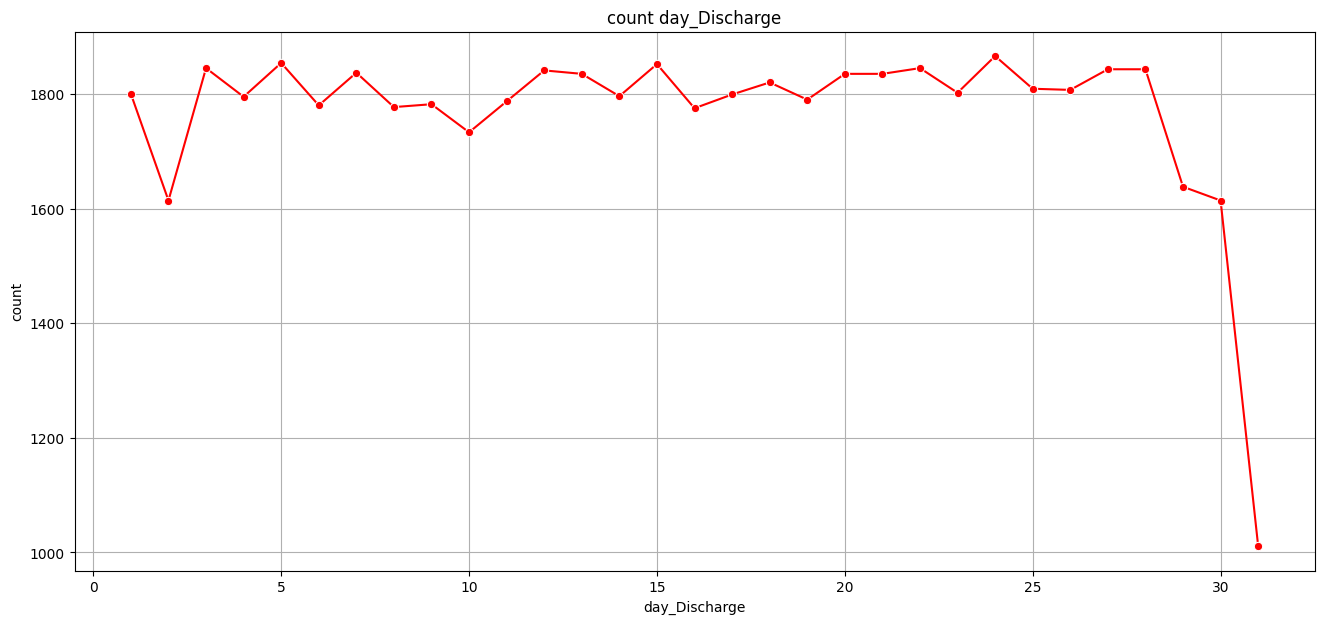

count month_Discharge : 
 month_Discharge
2     4281
4     4432
11    4478
6     4514
3     4560
10    4601
12    4602
1     4615
5     4648
9     4672
8     4716
7     4741
Name: count, dtype: int64


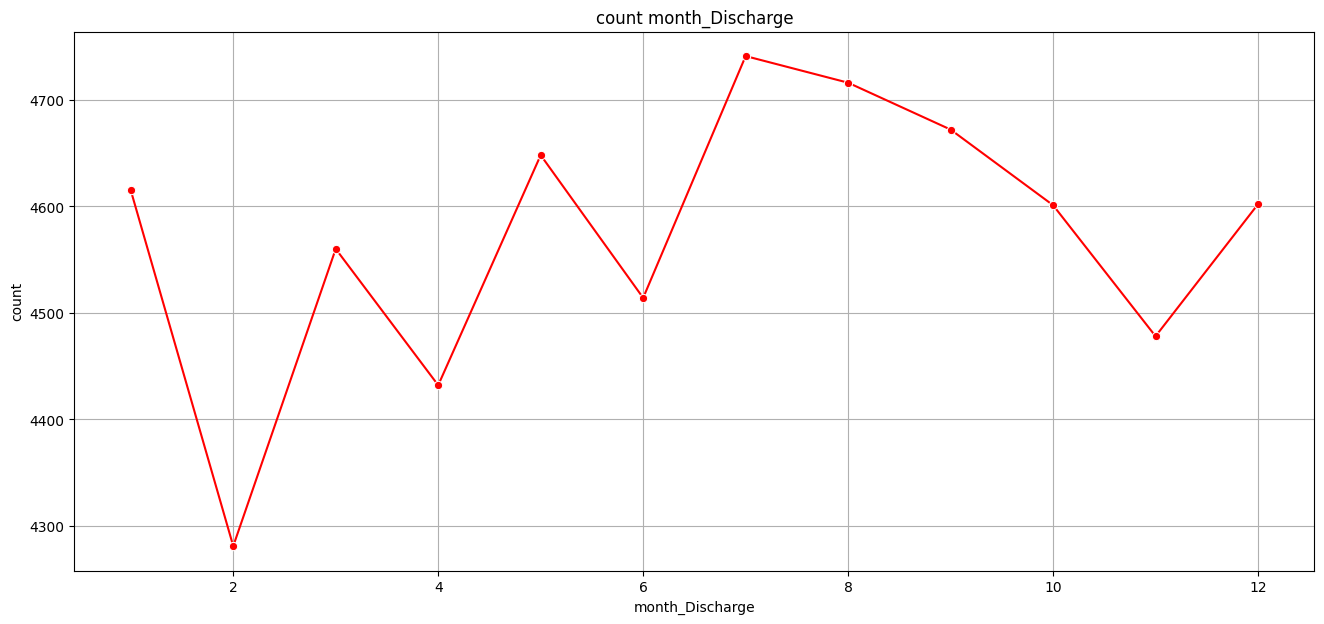

count year_Discharge : 
 year_Discharge
2024     4262
2019     6821
2021    10758
2022    10895
2023    10950
2020    11174
Name: count, dtype: int64


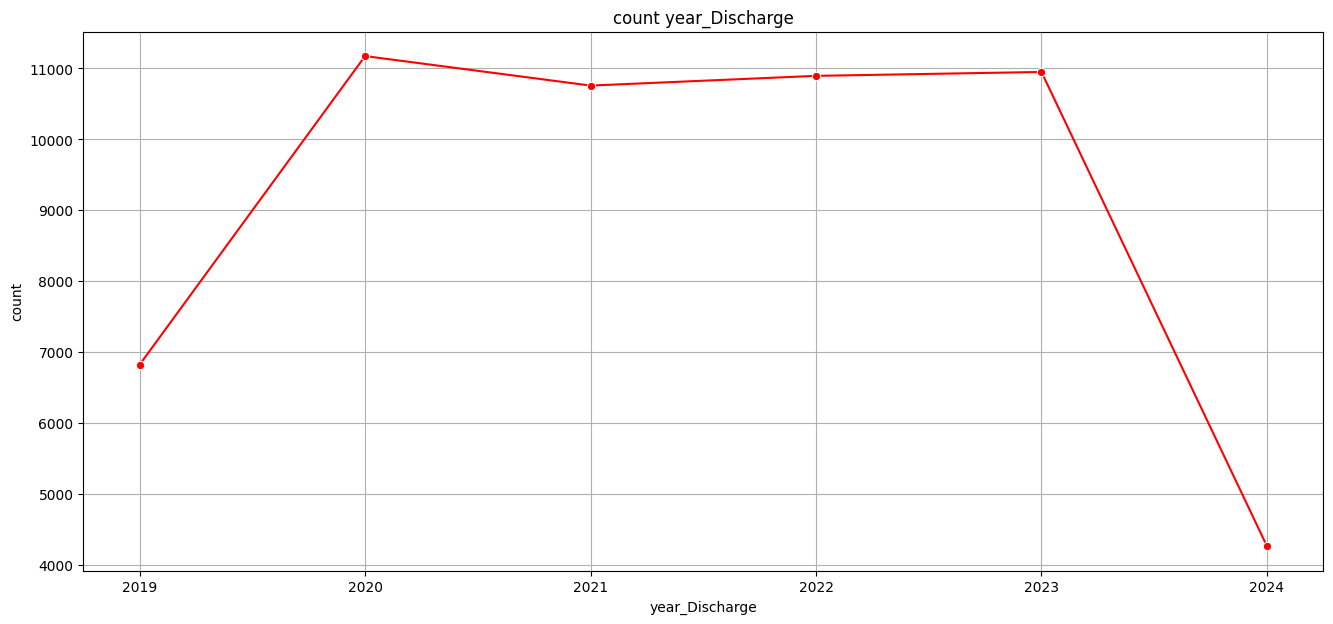

count week_Discharge : 
 week_Discharge
Tuesday      7686
Monday       7793
Saturday     7808
Sunday       7843
Wednesday    7873
Thursday     7920
Friday       7937
Name: count, dtype: int64


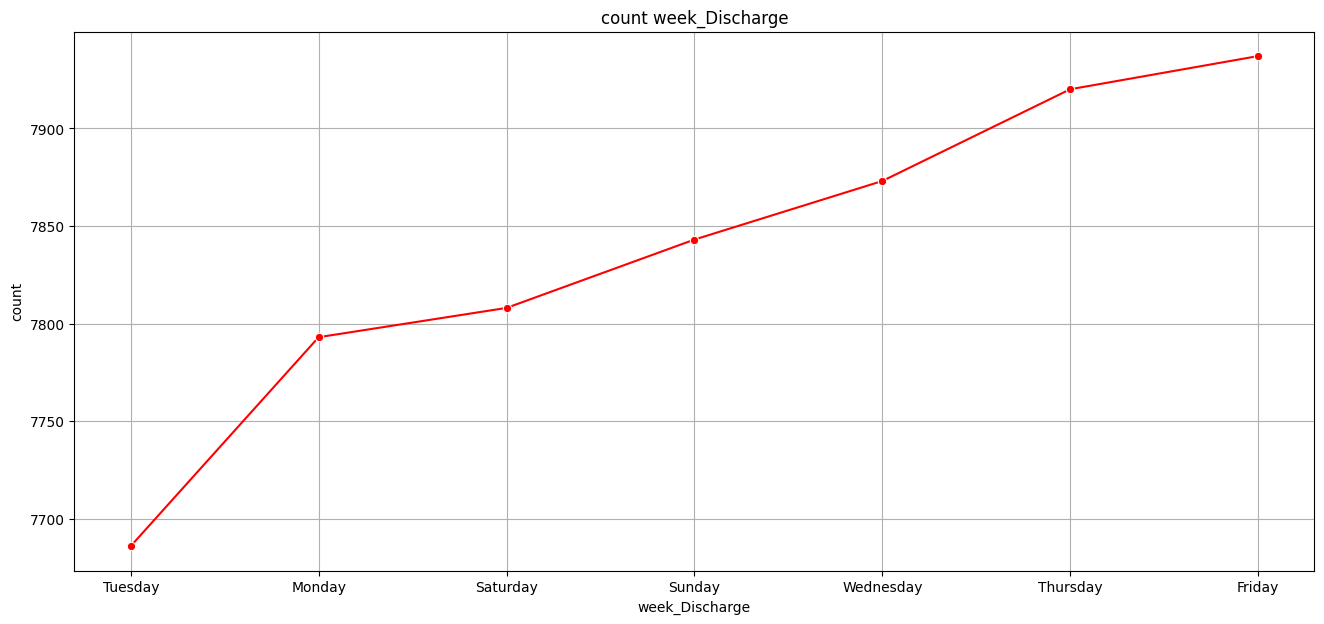

In [24]:
columns = ['Gender','Blood Type' , 'Medical Condition', 'Insurance Provider' , 'Admission Type' , 'Medication' , 'Test Results']
columns_date = ['day_Admission','month_Admission','year_Admission','week_Admission','day_Discharge','month_Discharge','year_Discharge','week_Discharge']
# a function to count the values
def get_value_counts(col):
    df = data[col].value_counts().sort_values()
    print(f'count {col} : \n {df}')
    return df
# a function to plot a bar chart
def plot_bar_chart(labels , counts ,ylabel ,tit):
    plt.figure(figsize=(16 , 7))
    sns.barplot(x = labels , y = counts)
    plt.xlabel(col)
    plt.ylabel(ylabel)
    plt.title(tit)
    plt.tight_layout()
    plt.xticks(rotation = 45)
    plt.show()
for col in columns:
    df = get_value_counts(col)
    plot_bar_chart(df.index , df.values , 'count' , f'count {col}')
# Function to plot a line chart
def line_plot_dubel(labels , values , ylabel , tit):
    plt.figure(figsize=(16 , 7))
    sns.lineplot(x = labels , y = values , marker= 'o',color = 'red')
    plt.xlabel(col)
    plt.ylabel(ylabel)
    plt.title(tit)
    plt.grid()
    plt.show()
for col in columns_date:
    df2 = get_value_counts(col)
    line_plot_dubel(df2.index , df2.values , 'count' , f'count {col}')

- Blood types among patients are relatively evenly distributed. The most common blood type is A- with 6,969 cases, followed closely by A+ with 6,956 cases. The least common is O- with 6,877 cases. This indicates that there is no significant disparity in the distribution of blood types.
- The medical conditions among patients are fairly evenly distributed. Arthritis is the most common condition with 9,308 cases, followed closely by Diabetes with 9,304 cases. The least common condition is Asthma, with 9,185 cases. This suggests that the dataset includes a balanced representation of the most common chronic illnesses.
- Patients are fairly evenly distributed across different health insurance providers. The most commonly used provider is Cigna with 11,249 patients, followed by Medicare with 11,154 patients, while the least used provider is Aetna with 10,913 patients. This indicates a diverse utilization of insurance services among patients without a dominant provider.
- Hospital admissions are distributed among three main categories. The most common admission type is Elective with 18,655 cases, followed by Urgent with 18,576 cases, and Emergency with 18,269 cases. This suggests that the majority of admissions were non-emergency, which may reflect the nature of the healthcare system or patient case patterns.
- The data shows a relatively balanced distribution of medication usage among patients. Lipitor is the most commonly used medication with 11,140 patients, followed by Ibuprofen with 11,127 patients, while Penicillin is the least used with 11,068 patients. This indicates a diverse use of medications with no significant disparity in usage rates.
- Test results are distributed across three main categories. The most frequent result is "Abnormal" with 18,627 patients, followed by "Normal" with 18,517 patients, and "Inconclusive" with 18,356 patients. This indicates that a significant portion of patients had test results suggesting potential health issues.
- The distribution of hospital admissions by day of the month shows slight variation. Day 3 had the highest number of admissions with 1,936 cases, followed by Day 24 with 1,908 cases. The lowest number was recorded on Day 31, with 1,026 cases, which is expected as not all months have 31 days.Overall, the distribution appears fairly balanced, suggesting a relatively steady admission rate throughout the month, with minor peaks during mid to late-month periods.
-The distribution of hospital admissions by month shows slight seasonal variation throughout the year.August (8) recorded the highest number of admissions with 4,832 cases, followed closely by July (7) with 4,812 cases, suggesting increased hospital activity during the summer months.On the other hand, February (2) had the lowest number of admissions at 4,255, which is expected due to its shorter length.Overall, the pattern suggests mild seasonality, with slightly higher admissions mid-year and relatively lower at the beginning.
- The year 2020 recorded the highest number of admissions with 11,285 cases, aligning with the peak of the COVID-19 pandemic and its strain on healthcare systems.
It was followed closely by 2023 and 2022, with 11,026 and 11,017 admissions respectively, indicating a continued high demand for hospital services post-pandemic.2024 had the lowest number of admissions, with 3,854 cases.Notably, 2019 had a relatively lower count (7,387), reflecting pre-pandemic conditions.
- Thursday recorded the highest number of admissions with 7,989 cases, followed closely by Tuesday with 7,982 cases, while Monday had the lowest with 7,866 cases.This close distribution suggests that patient admissions remain steady throughout the week, indicating consistent hospital operations.
- Day 24 recorded the highest number of discharges with 1,887 cases, followed by Day 15 with 1,874 cases, while Day 31 had the lowest with 1,025 cases, which is expected since not all months include this day.
- July (7) had the highest number of discharges at 4,793 cases, followed by August (8) with 4,765 cases, while February (2) had the lowest with 4,319 cases.
- The highest number of discharges occurred in 2020, with 11,307 cases, followed by 2023 and 2022 with 11,060 and 11,019 cases, respectively.
On the other hand, 2019 had the lowest count among the full years, with 6,921 cases, reflecting lower hospital demand before the pandemic.2024 recorded the lowest number overall with 4,302 discharges
- Thursday recorded the highest number of discharges with 8,029 cases, followed by Friday with 8,019 cases, while Tuesday had the lowest at 7,779 cases.

med Gender : 
         median        std
Gender                   
Female    52.0  19.670455
Male      52.0  19.540223


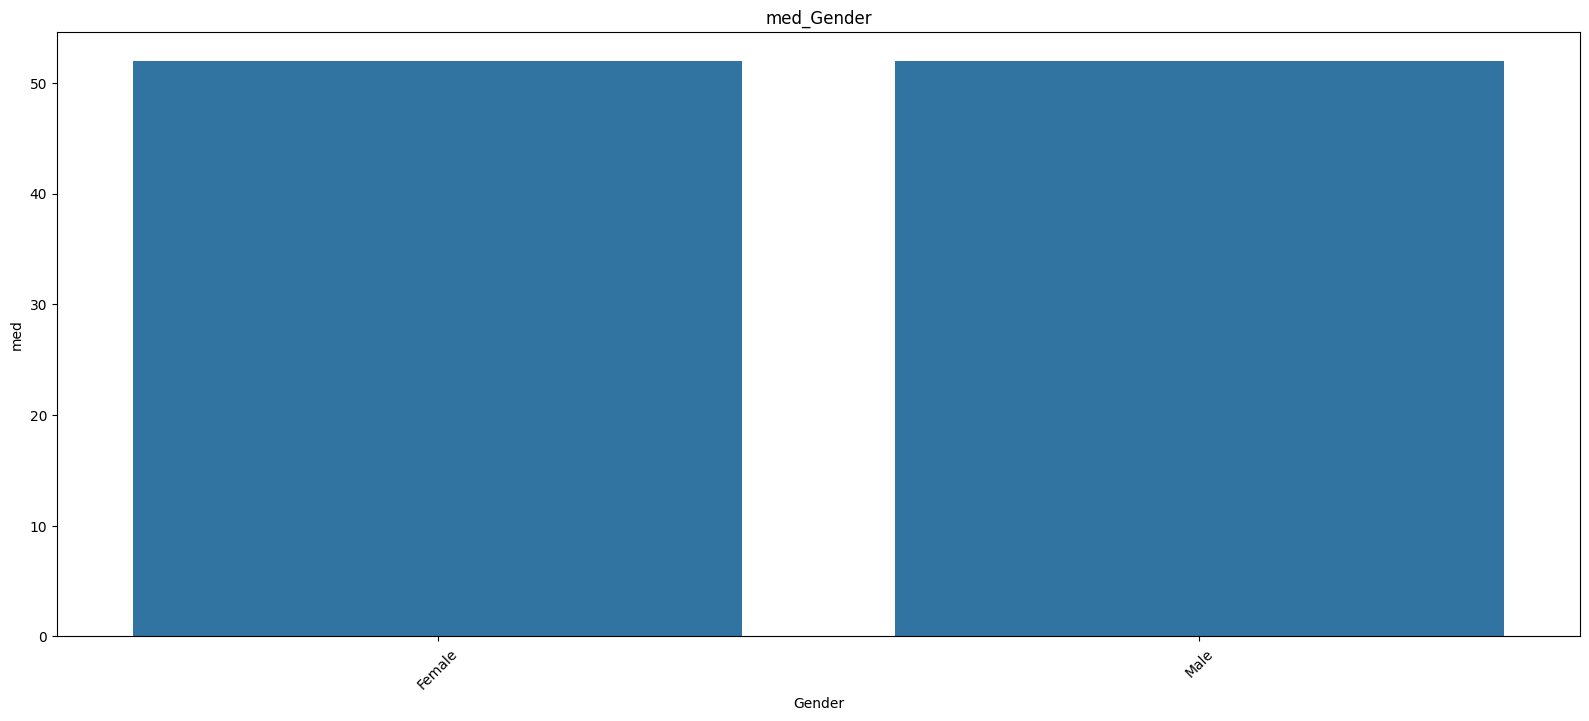

med Blood Type : 
             median        std
Blood Type                   
O+            51.0  19.482250
B-            51.0  19.682671
A+            52.0  19.788202
A-            52.0  19.545746
AB-           52.0  19.662921
AB+           52.0  19.502026
B+            52.0  19.507520
O-            52.0  19.673569


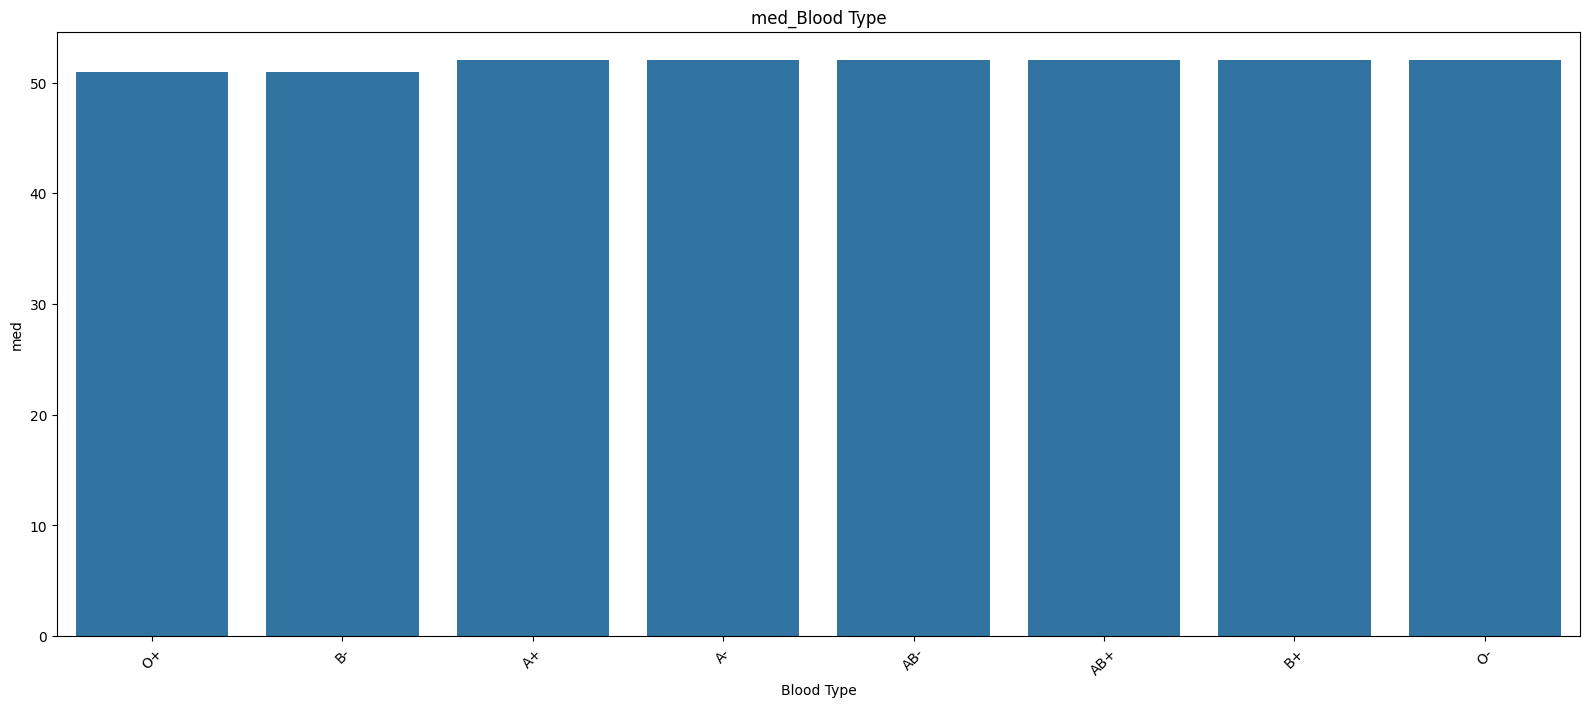

med Medical Condition : 
                    median        std
Medical Condition                   
Arthritis            51.0  19.627395
Obesity              51.0  19.540502
Cancer               52.0  19.664630
Asthma               52.0  19.731970
Diabetes             52.0  19.411651
Hypertension         52.0  19.657803


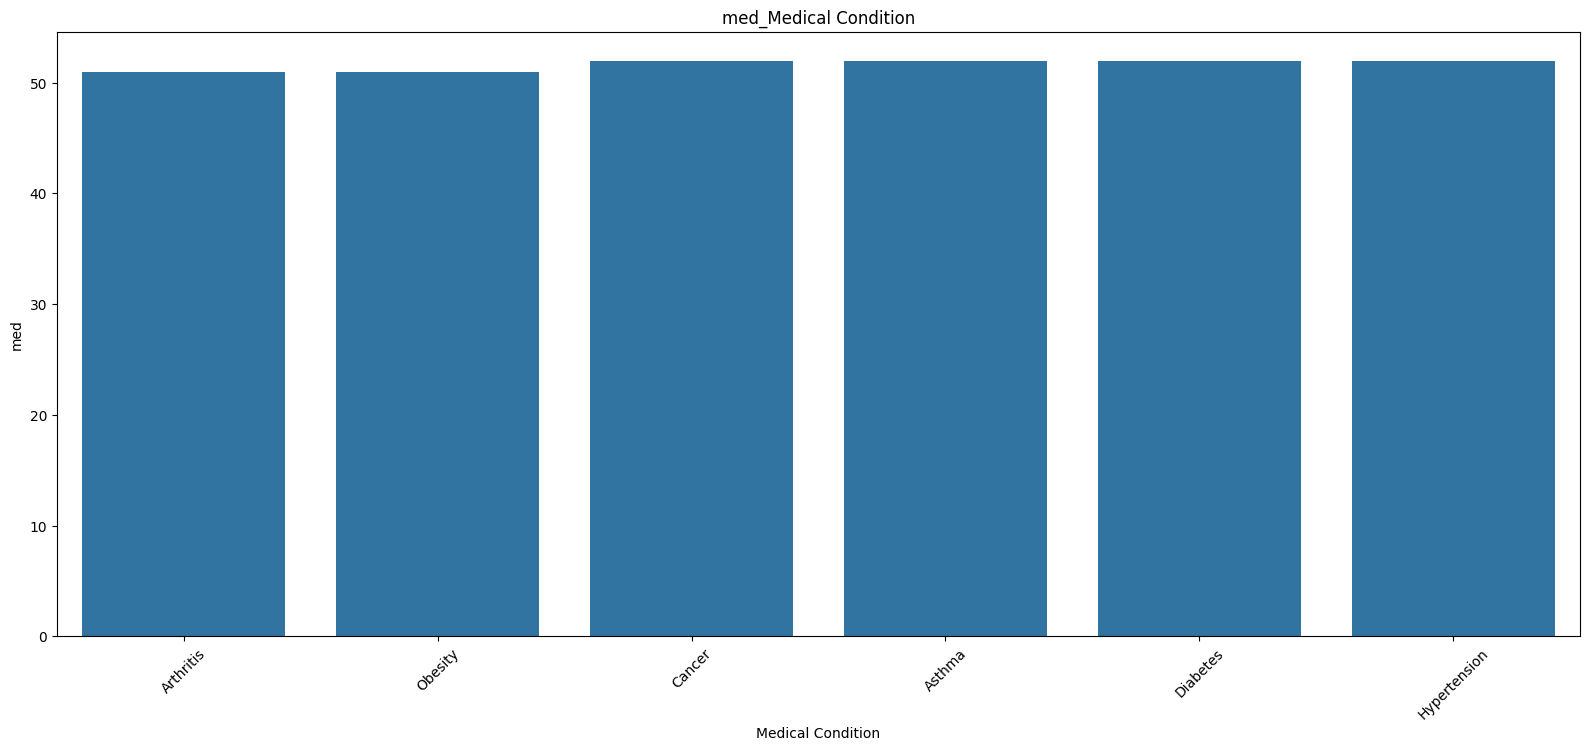

med Insurance Provider : 
                     median        std
Insurance Provider                   
Cigna                 51.0  19.705753
Aetna                 52.0  19.569106
Blue Cross            52.0  19.655475
Medicare              52.0  19.477640
UnitedHealthcare      52.0  19.617921


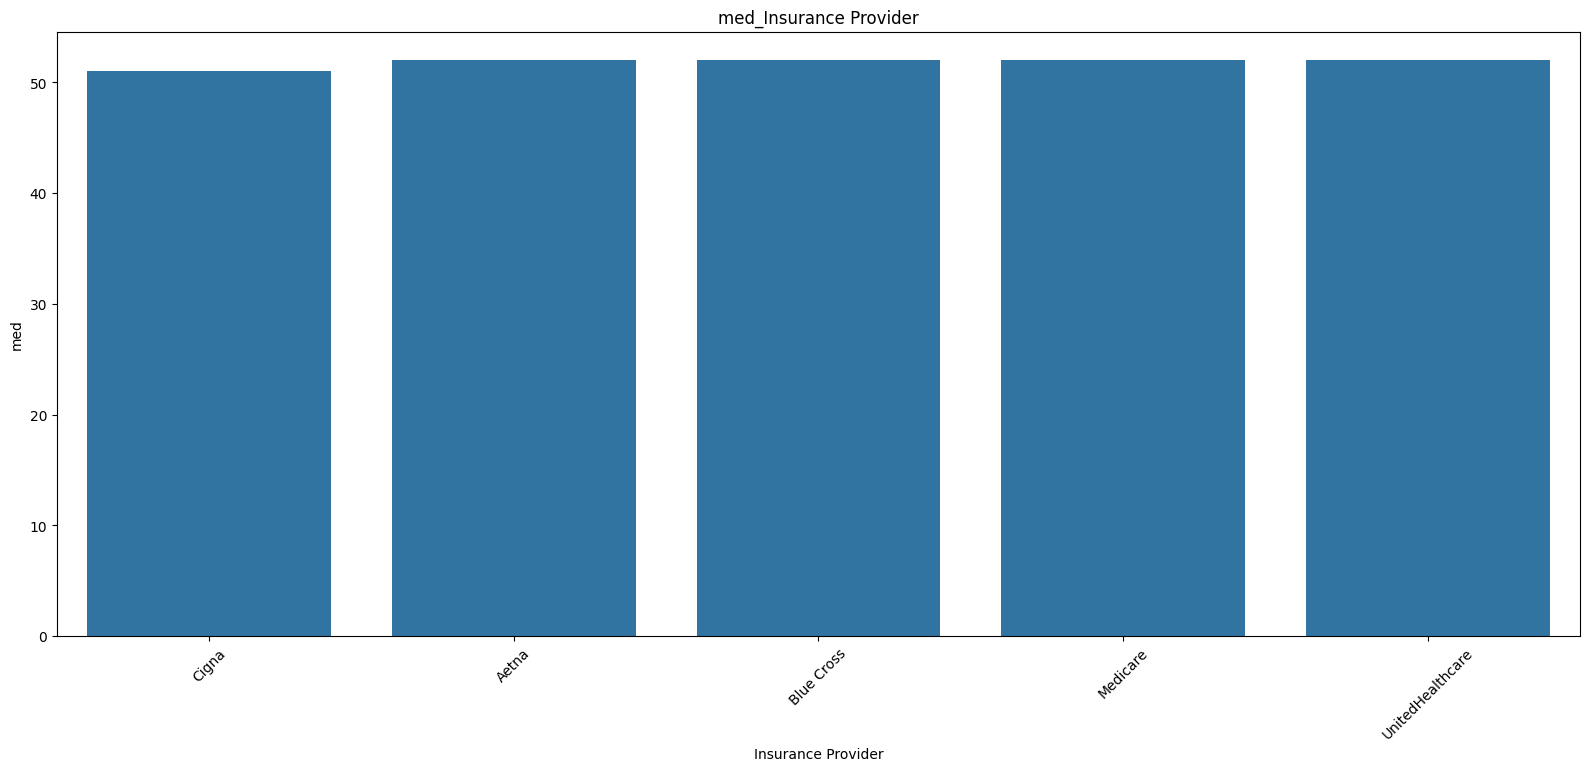

med Admission Type : 
                 median        std
Admission Type                   
Elective          52.0  19.432125
Emergency         52.0  19.722938
Urgent            52.0  19.662867


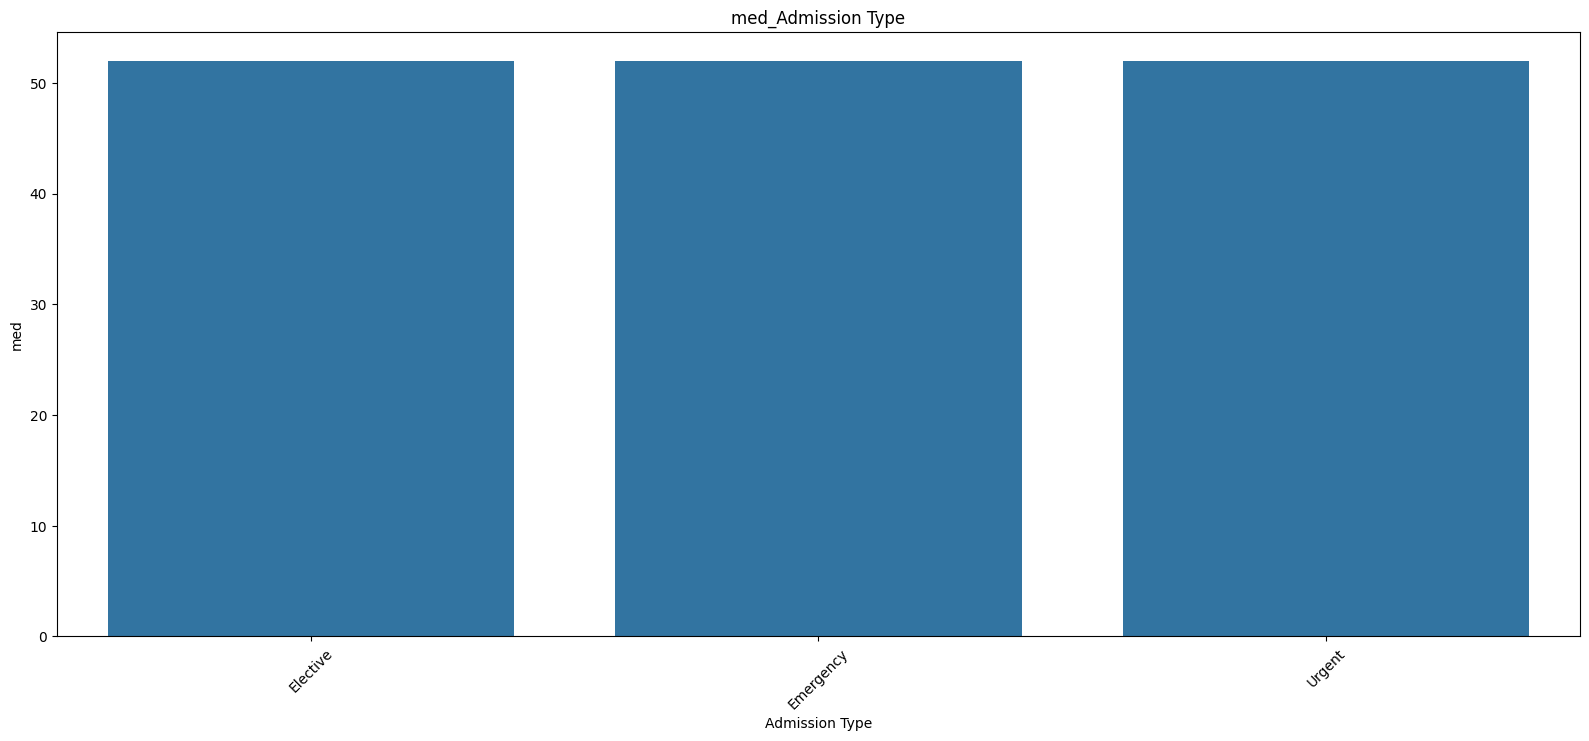

med Medication : 
              median        std
Medication                    
Lipitor        51.0  19.534998
Penicillin     51.0  19.655711
Ibuprofen      52.0  19.730828
Aspirin        52.0  19.616169
Paracetamol    52.0  19.486930


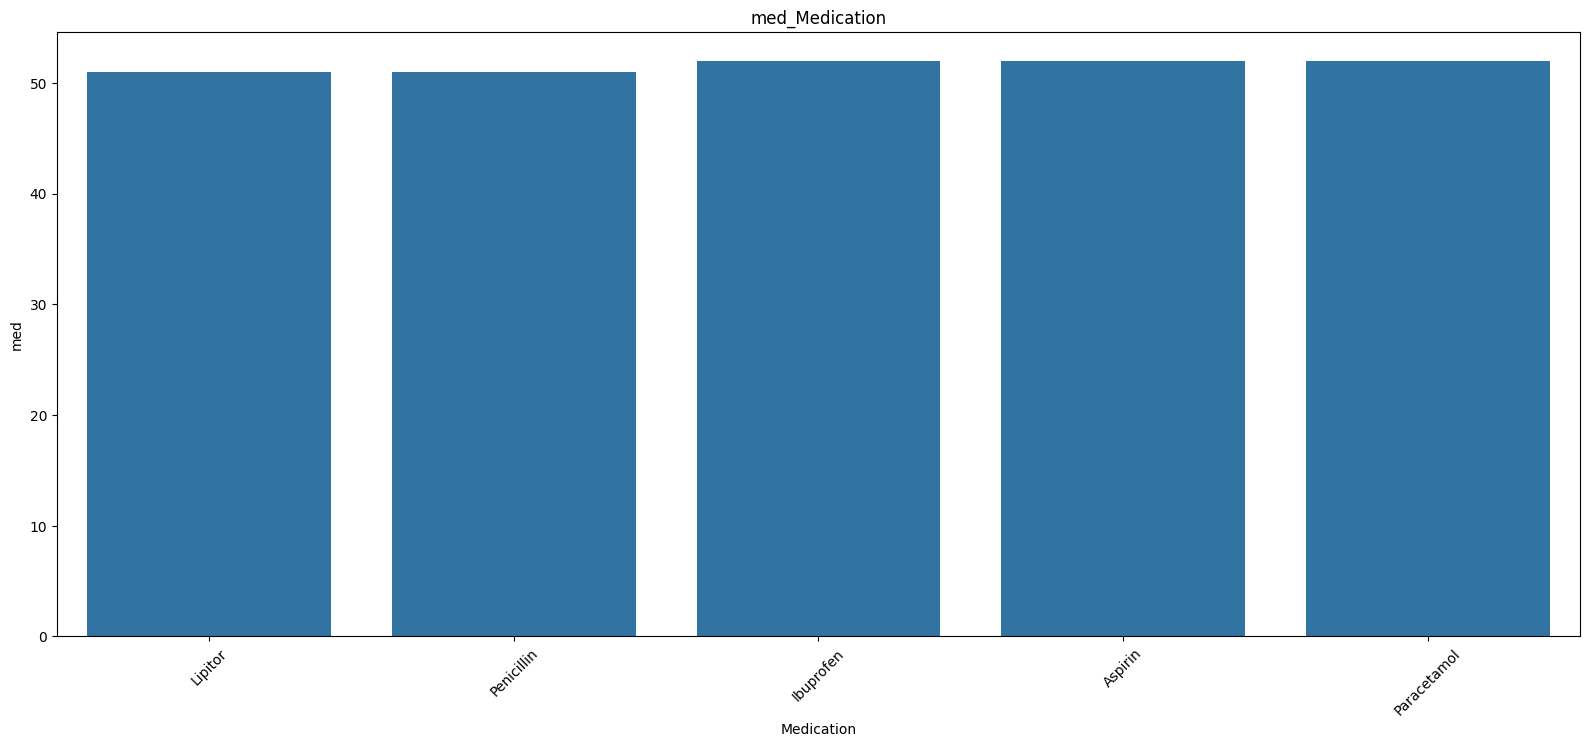

med Test Results : 
               median        std
Test Results                   
Normal          51.0  19.714085
Abnormal        52.0  19.557639
Inconclusive    52.0  19.542606


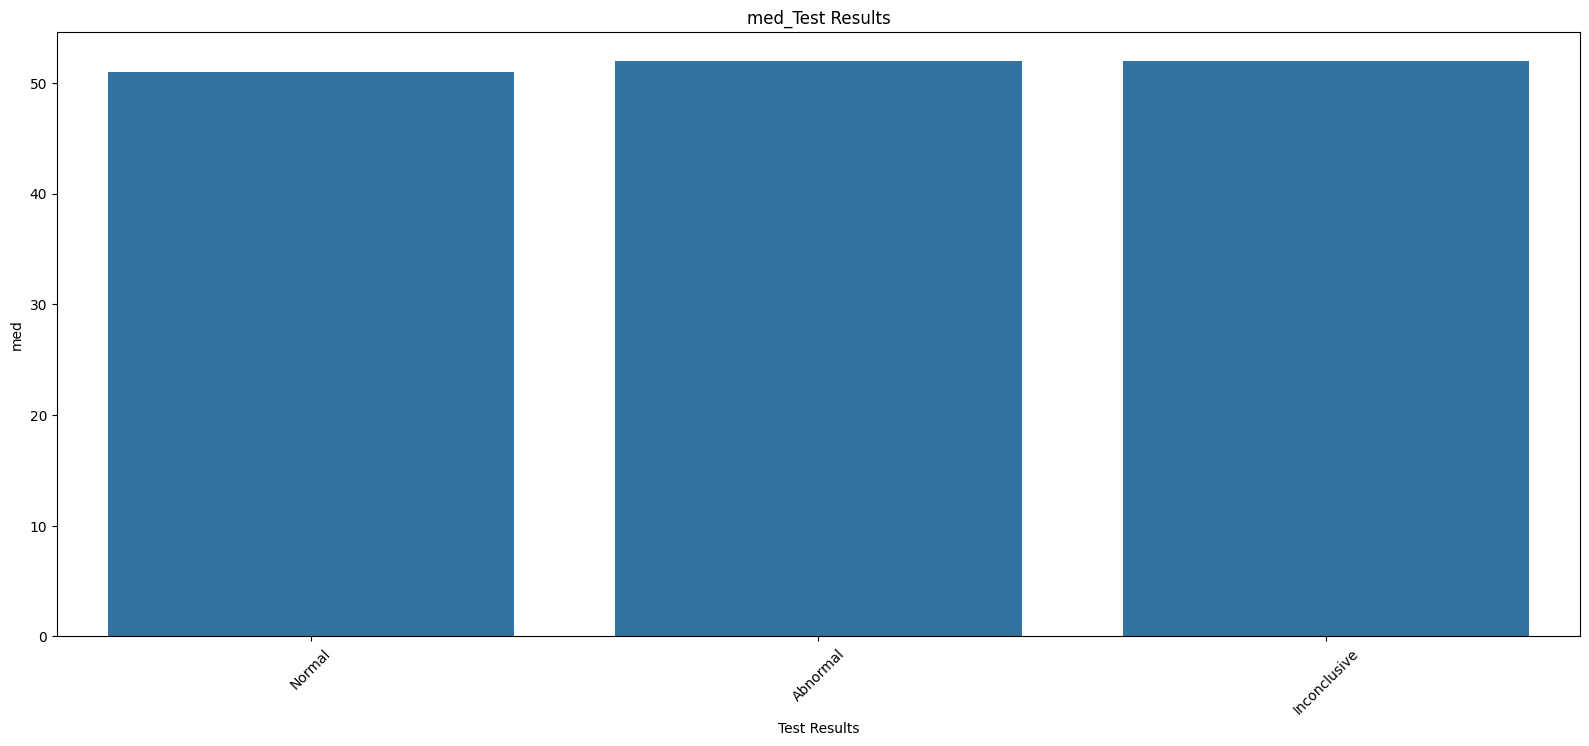

In [25]:
# a function to find the median age per category
def med_col(col):
    df = data.groupby(col)['Age'].agg(['median' , 'std']).sort_values(by='median')
    print(f'med {col} : \n {df}')
    return df
for col in columns: 
    df2 = med_col(col)
    plot_bar_chart(df2.index , df2['median'] , 'med' ,f'med_{col}')

- These findings suggest that there is no significant difference in age distribution between males and females. The similarity in both median and standard deviation values indicates a relatively homogeneous age profile across genders.
- The analysis suggests a relatively homogeneous age distribution among different medical conditions. No significant age-related differences were observed, which implies that age is not a major distinguishing factor across these patient groups in this dataset.
- These findings suggest a uniform age distribution among patients regardless of their insurance provider. The slight differences in median and standard deviation indicate that insurance type is not a significant factor in age variation within this dataset.
- The data reflects a uniform central age trend across all admission types, with only minor differences in variability. While emergency cases show slightly more age diversity, the overall age profiles remain relatively consistent.
- The findings show a generally homogeneous age distribution among patients using different medications. The minor differences in median and variability suggest that medication type is not strongly associated with age in this dataset
- The findings suggest that test result categories do not show significant differences in age distribution. Age does not appear to be a major differentiator across test outcomes in this dataset.

mean Gender : 
                 mean           std
Gender                            
Female  25529.935010  14165.661926
Male    25659.242696  14186.014277


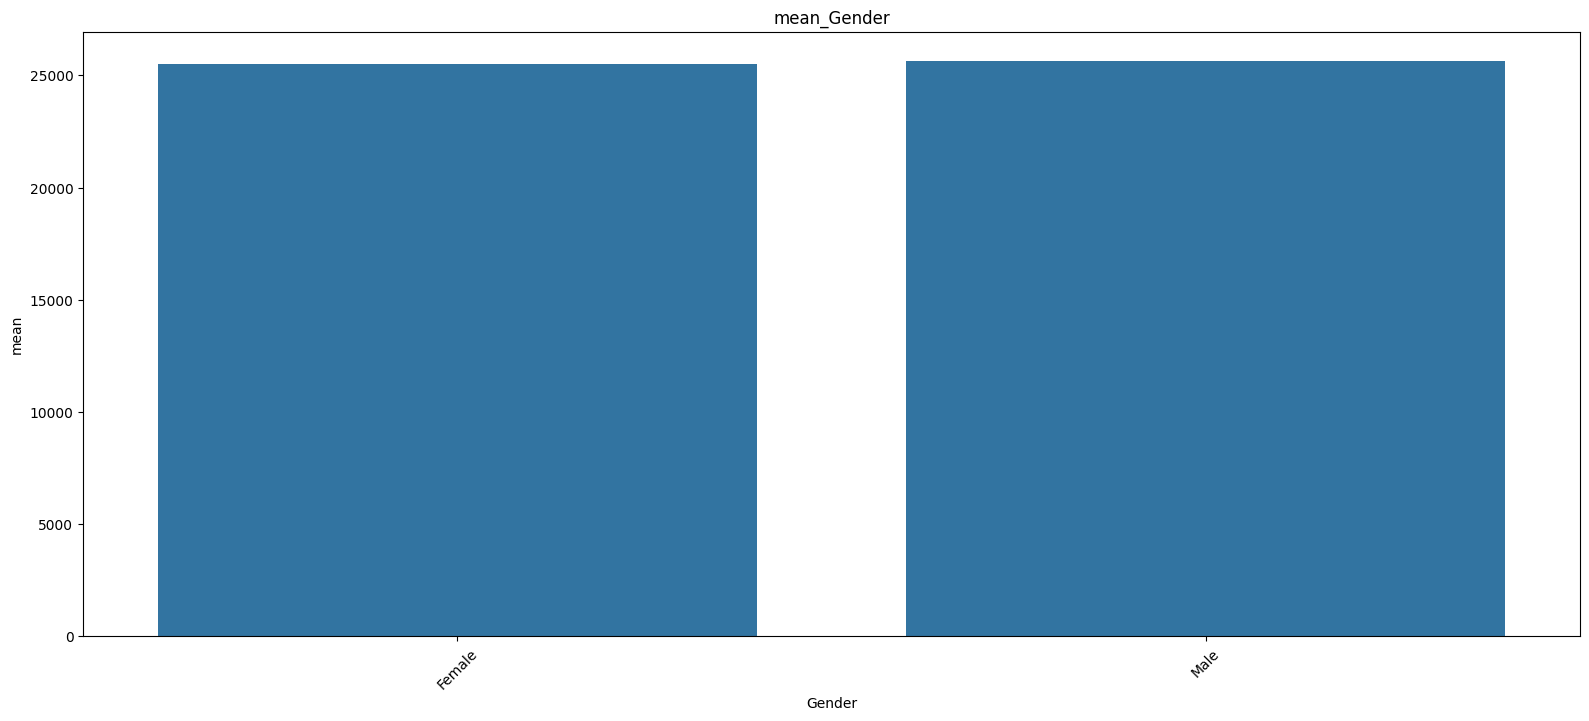

mean Blood Type : 
                     mean           std
Blood Type                            
O+          25283.741784  14374.964722
AB+         25389.993896  14206.836742
B+          25457.840852  14043.002005
B-          25585.279334  14142.509496
A-          25658.873958  14086.856332
A+          25726.547277  14202.242786
AB-         25758.287288  14150.786590
O-          25899.060286  14195.218228


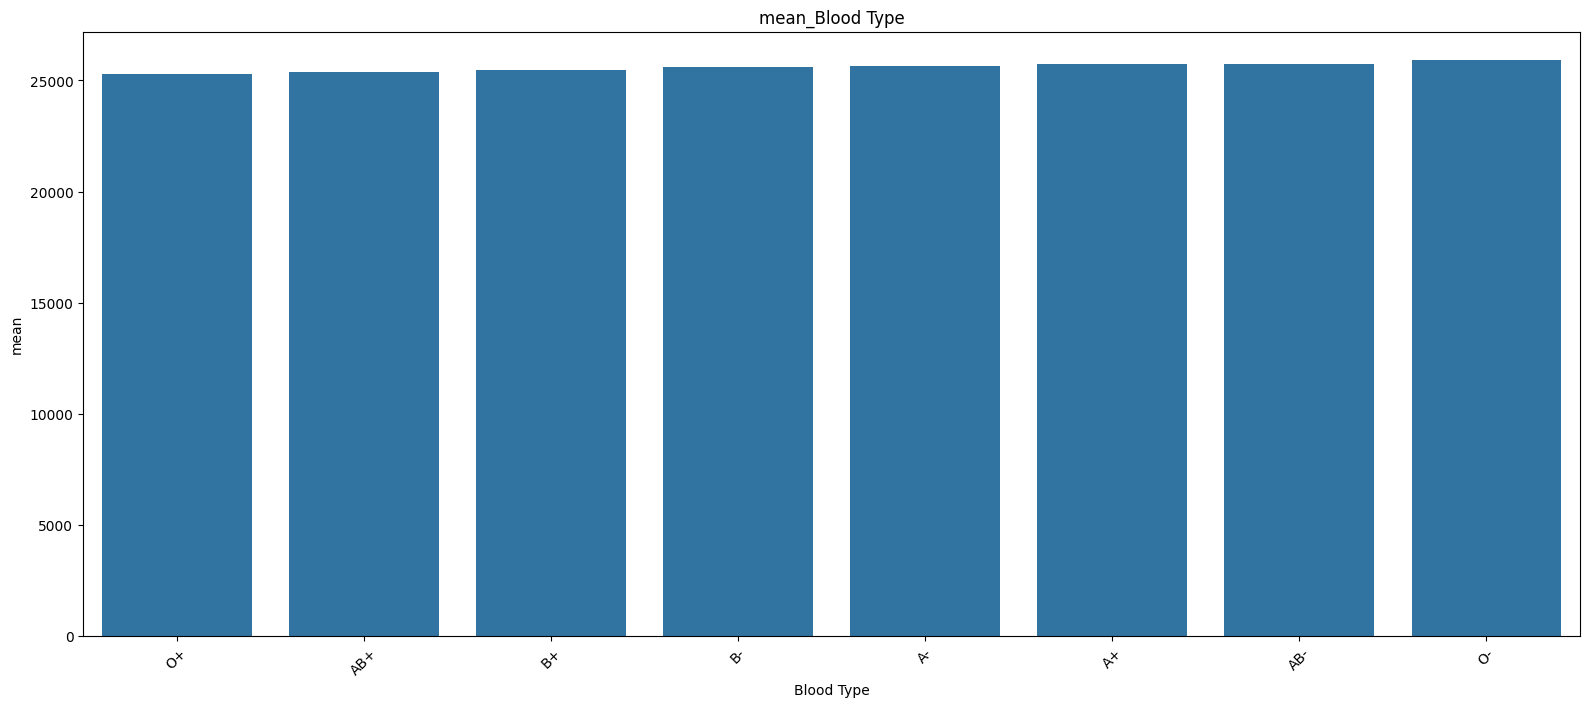

mean Medical Condition : 
                            mean           std
Medical Condition                            
Cancer             25205.924207  14152.948493
Arthritis          25542.898356  14262.184513
Hypertension       25559.844868  14270.503284
Asthma             25685.385020  14200.565274
Diabetes           25714.326349  14117.101921
Obesity            25859.215373  14045.479682


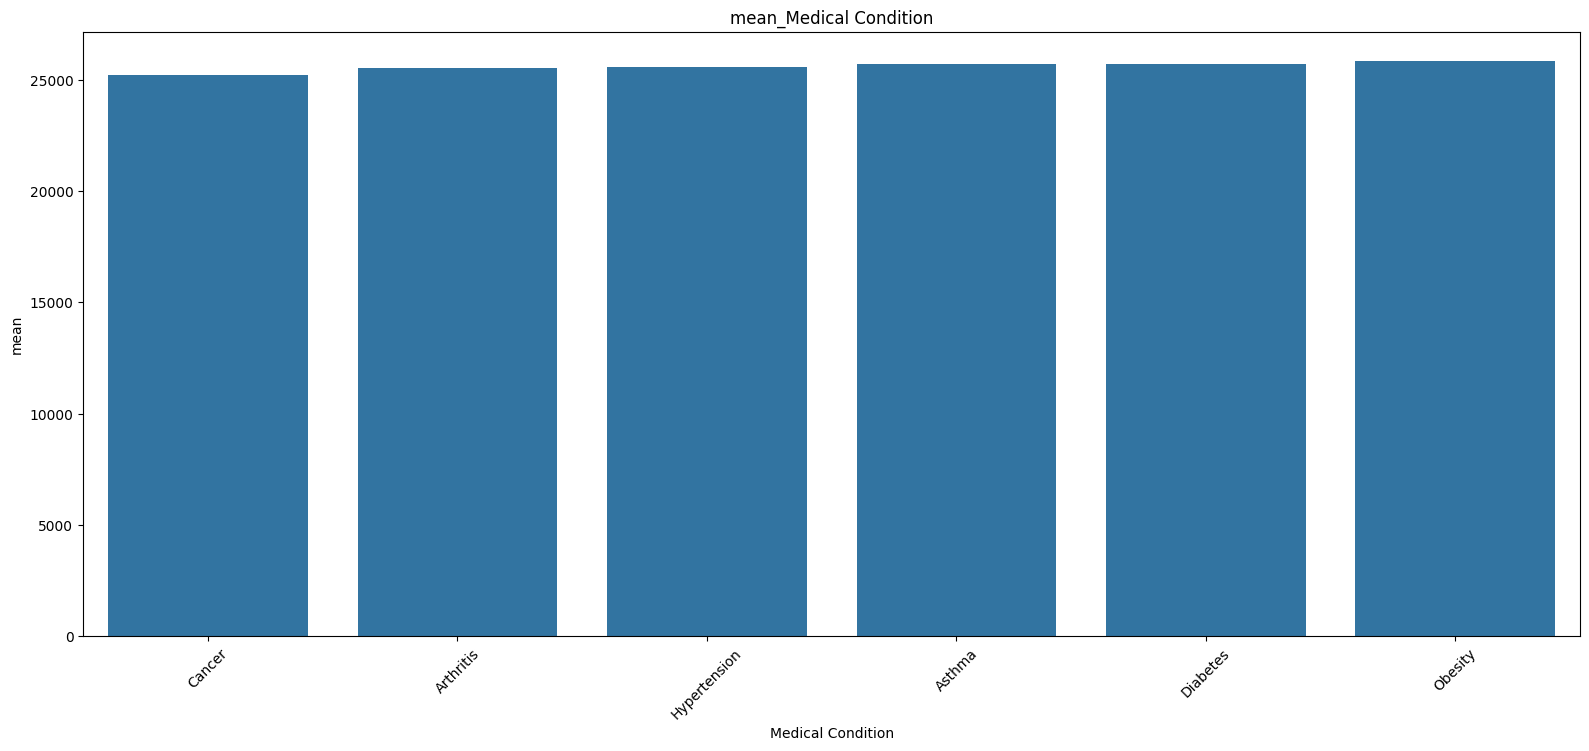

mean Insurance Provider : 
                             mean           std
Insurance Provider                            
UnitedHealthcare    25458.893302  14246.241190
Cigna               25582.227724  14215.294084
Aetna               25615.260975  14223.315766
Blue Cross          25639.269835  14089.438379
Medicare            25678.087847  14106.018751


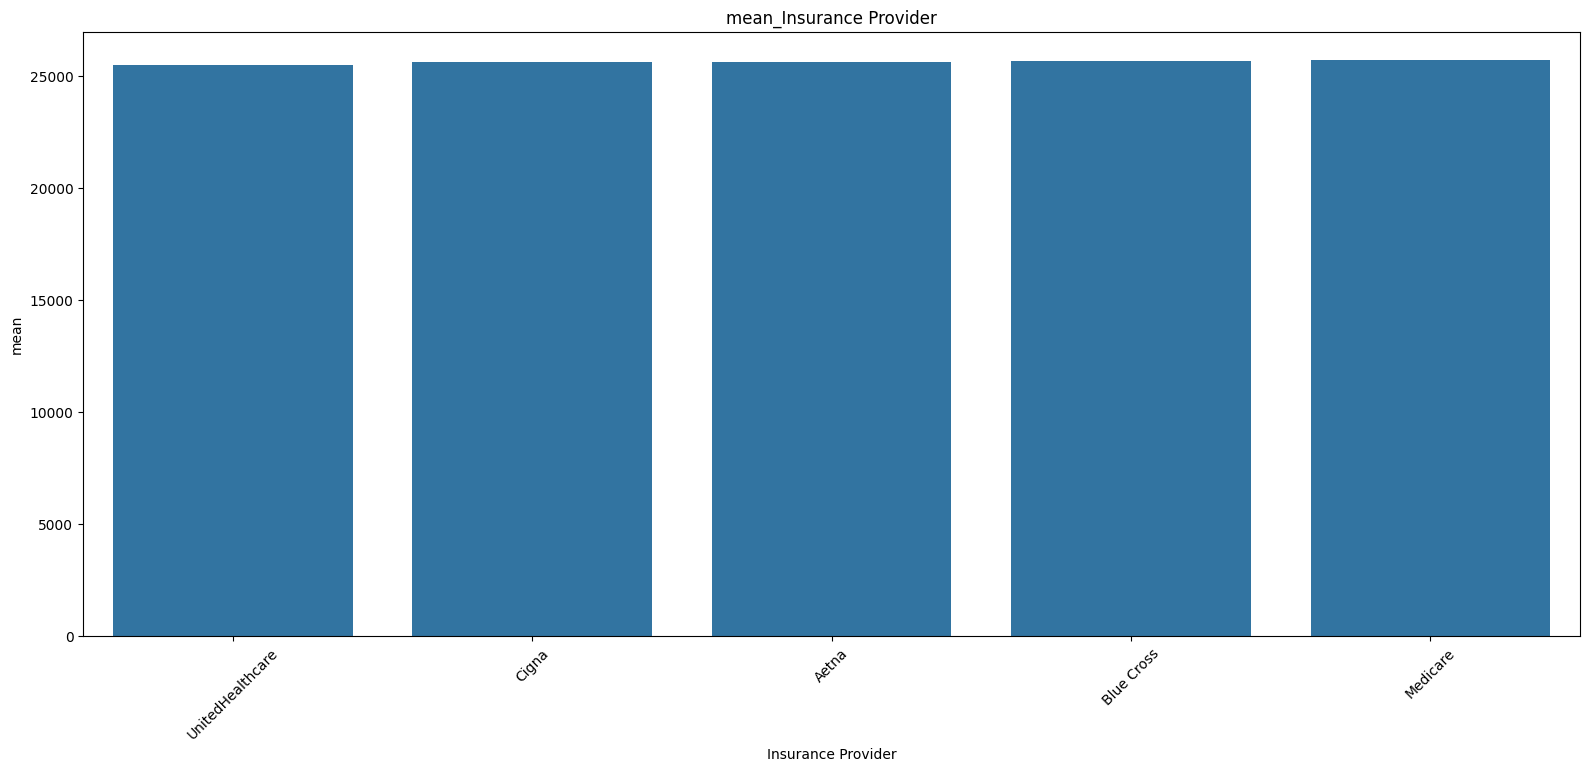

mean Admission Type : 
                         mean           std
Admission Type                            
Emergency       25551.133763  14130.358720
Urgent          25568.439653  14209.523345
Elective        25663.342261  14187.363355


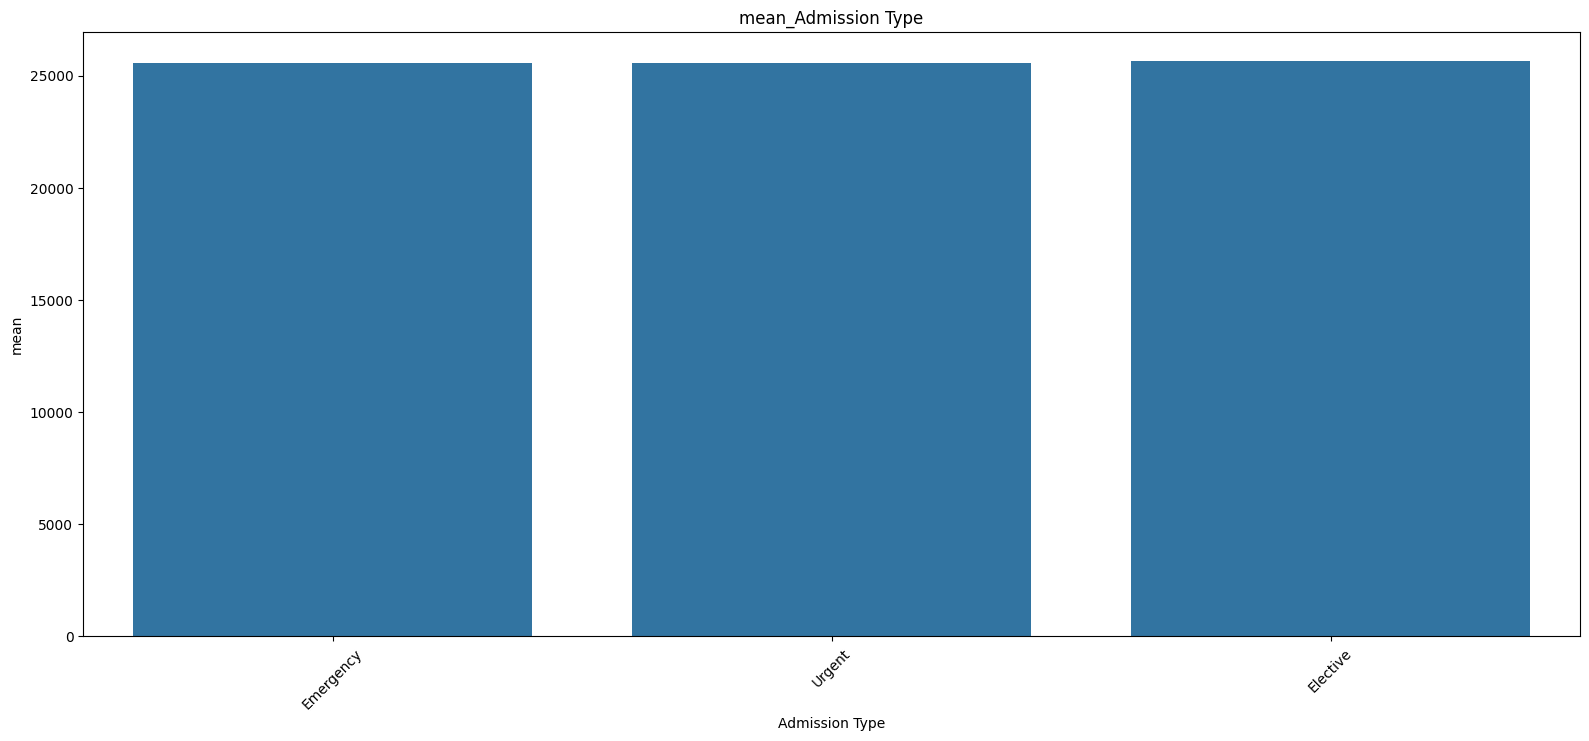

mean Medication : 
                      mean           std
Medication                             
Lipitor      25385.130765  14198.926728
Penicillin   25541.179478  14162.628892
Paracetamol  25604.901328  14124.564109
Aspirin      25647.124409  14282.133190
Ibuprofen    25795.036045  14109.816725


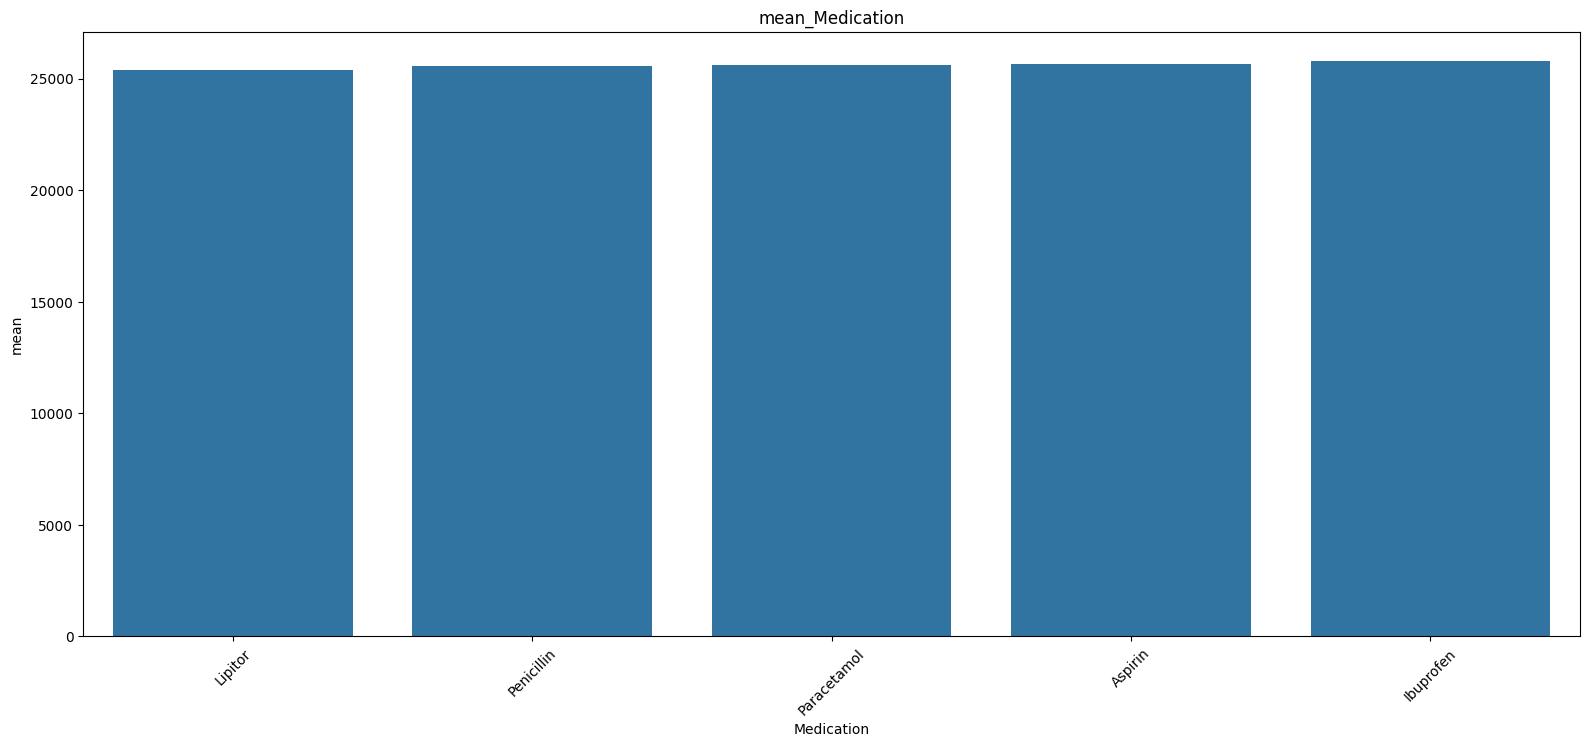

mean Test Results : 
                       mean           std
Test Results                            
Normal        25493.450056  14241.476421
Abnormal      25597.810527  14151.372658
Inconclusive  25693.395148  14134.396286


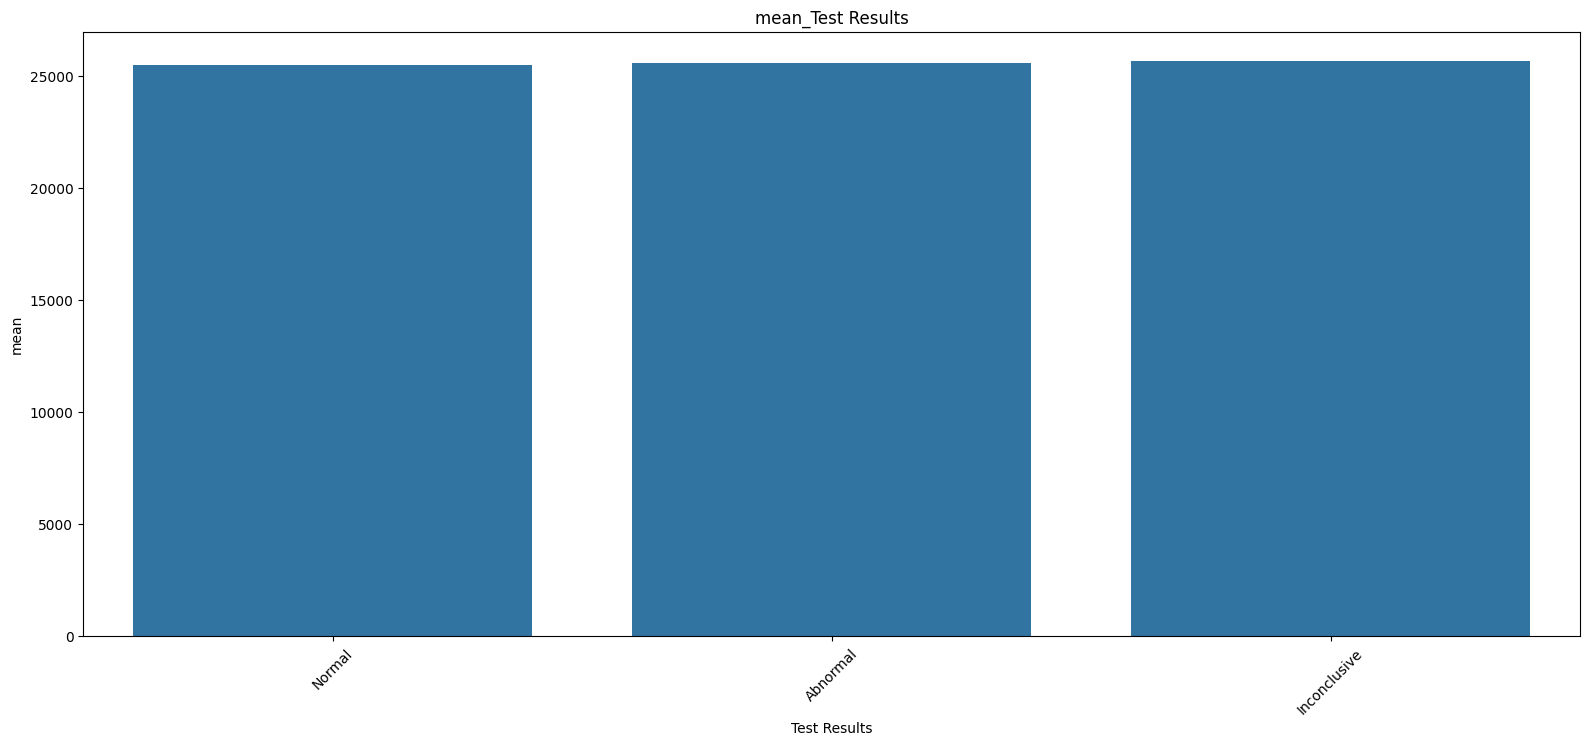

mean day_Admission : 
                        mean           std
day_Admission                            
21             24828.241623  14439.785745
5              25046.557974  14148.485403
13             25145.636301  14183.434260
25             25186.387235  14078.765382
17             25197.324813  13807.953710
20             25273.828668  14237.658721
27             25315.369022  14085.575897
18             25399.876074  14233.370395
26             25445.875609  14219.856967
28             25471.648432  14298.889397
23             25494.835464  14346.743838
10             25499.203216  14101.458623
16             25596.215954  14295.787361
30             25600.386896  14053.254565
3              25616.292886  13971.861727
31             25627.489194  14178.221297
2              25638.091546  14389.795851
14             25664.540694  14431.589993
19             25688.704566  13947.330361
29             25730.748370  13859.967306
4              25773.472165  14273.539611
7          

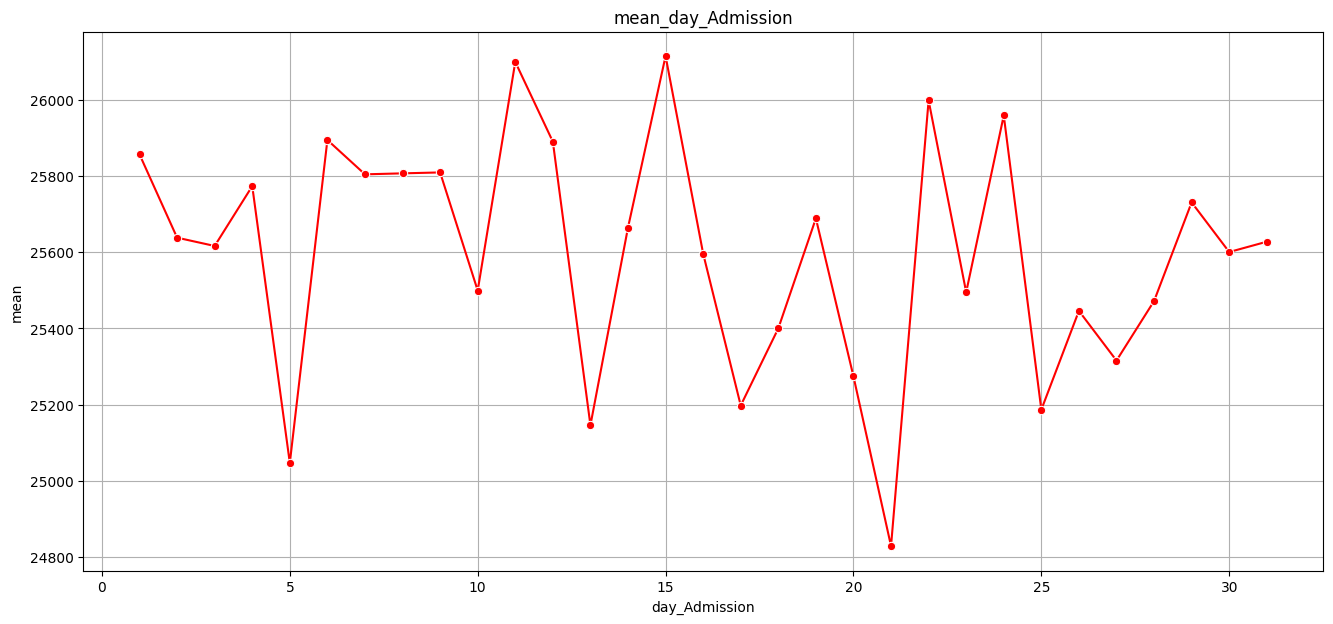

mean month_Admission : 
                          mean           std
month_Admission                            
9                25282.789982  14215.334372
5                25358.670878  14211.612828
2                25413.178166  14264.186830
4                25439.142443  13971.545644
8                25451.837940  14129.194258
3                25458.081326  14237.001615
7                25499.440850  14201.480283
12               25640.498235  14190.425048
11               25768.543838  14032.706102
1                25769.376361  14219.348224
6                25967.377060  14171.690596
10               26064.371849  14256.110478


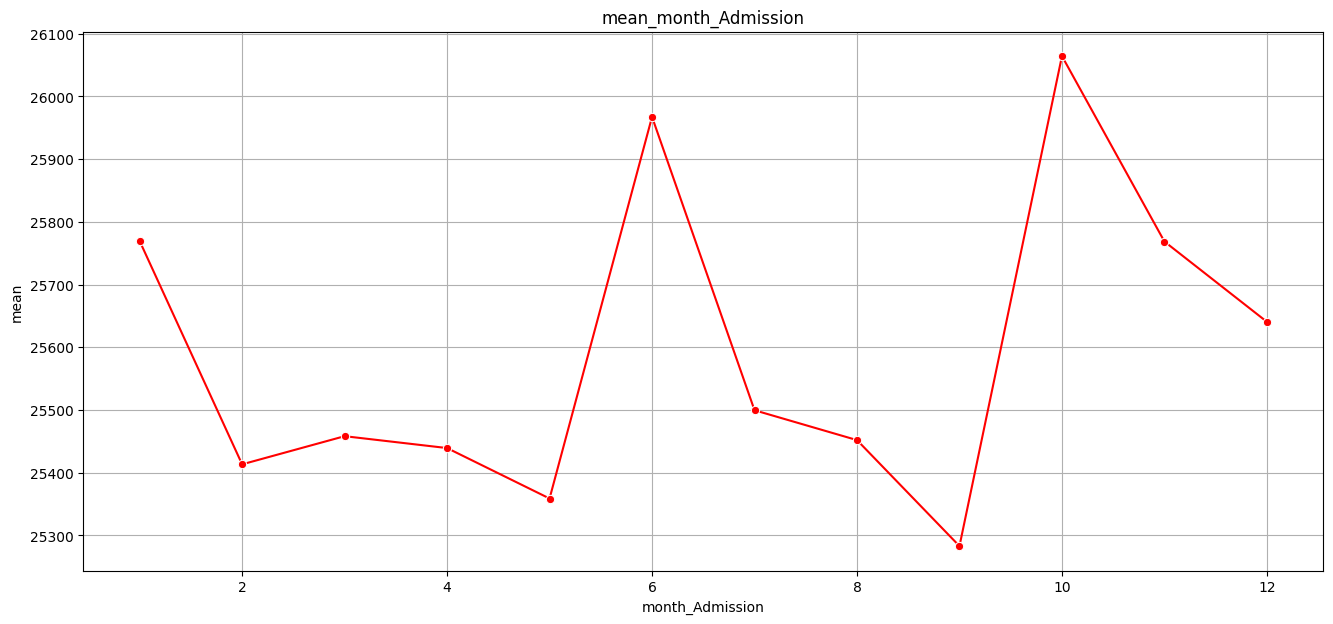

mean year_Admission : 
                         mean           std
year_Admission                            
2024            25438.718791  14126.043828
2020            25451.251549  14204.094653
2022            25583.103904  14155.302951
2023            25616.500614  14141.415294
2021            25677.311522  14245.287765
2019            25758.022598  14139.734083


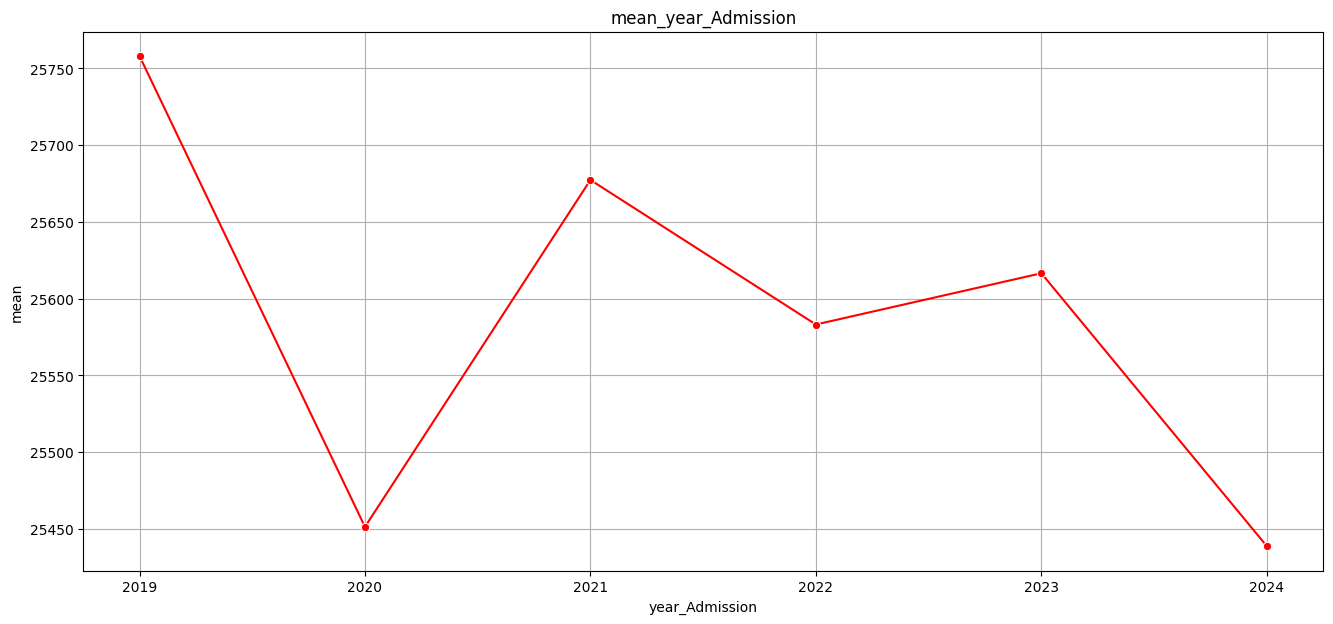

mean week_Admission : 
                         mean           std
week_Admission                            
Sunday          25410.036141  14118.673173
Wednesday       25517.834896  14128.572172
Thursday        25540.850030  14116.532940
Friday          25631.451662  14250.550347
Saturday        25654.699397  14110.382096
Tuesday         25670.762323  14308.242429
Monday          25738.631992  14199.516942


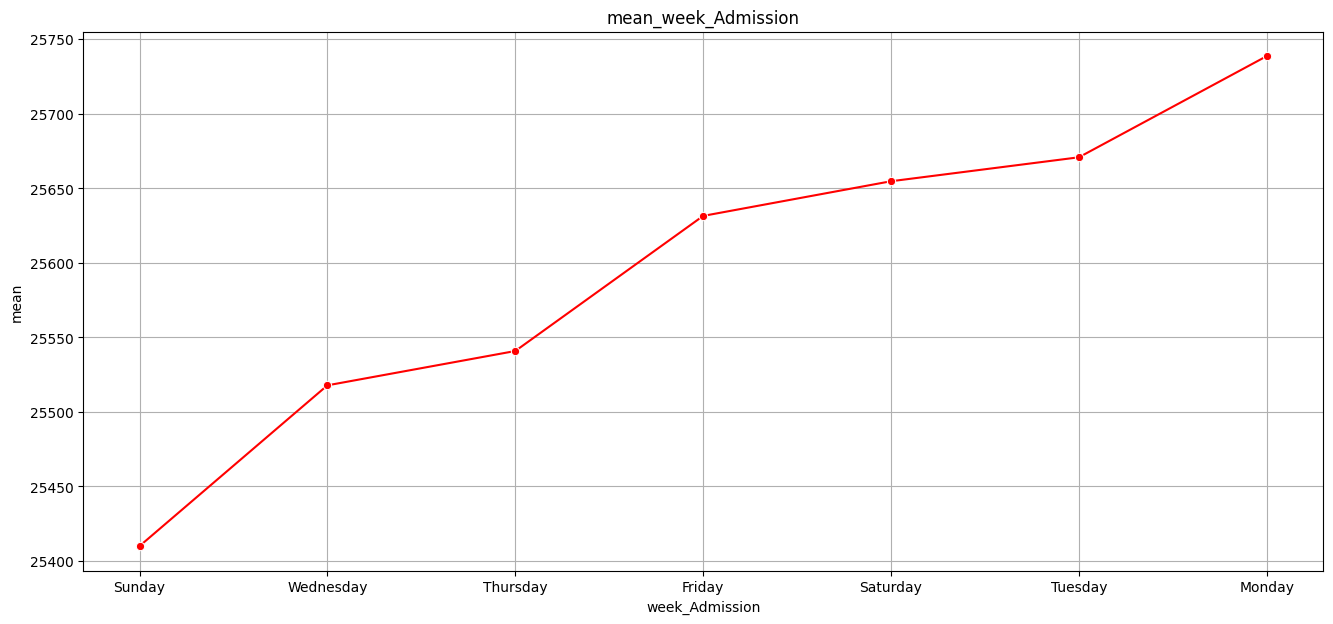

mean day_Discharge : 
                        mean           std
day_Discharge                            
21             24726.077103  14271.527764
31             24972.943677  14040.972208
11             25098.604402  14244.089253
27             25204.462311  14343.671998
14             25247.307747  13951.320913
22             25253.200034  14138.123689
19             25277.869653  14406.019337
24             25291.952501  13781.697218
1              25352.442548  13839.609684
10             25353.709608  14033.160048
2              25434.709474  14132.812922
3              25472.356128  14082.938537
13             25481.732089  14439.018610
12             25511.577257  14172.352443
18             25574.655308  14076.661811
25             25580.167003  14198.995609
6              25595.367124  14296.497428
7              25596.144626  14416.458198
15             25609.253829  14029.216829
17             25663.832013  14441.958225
23             25684.294141  14403.997182
20         

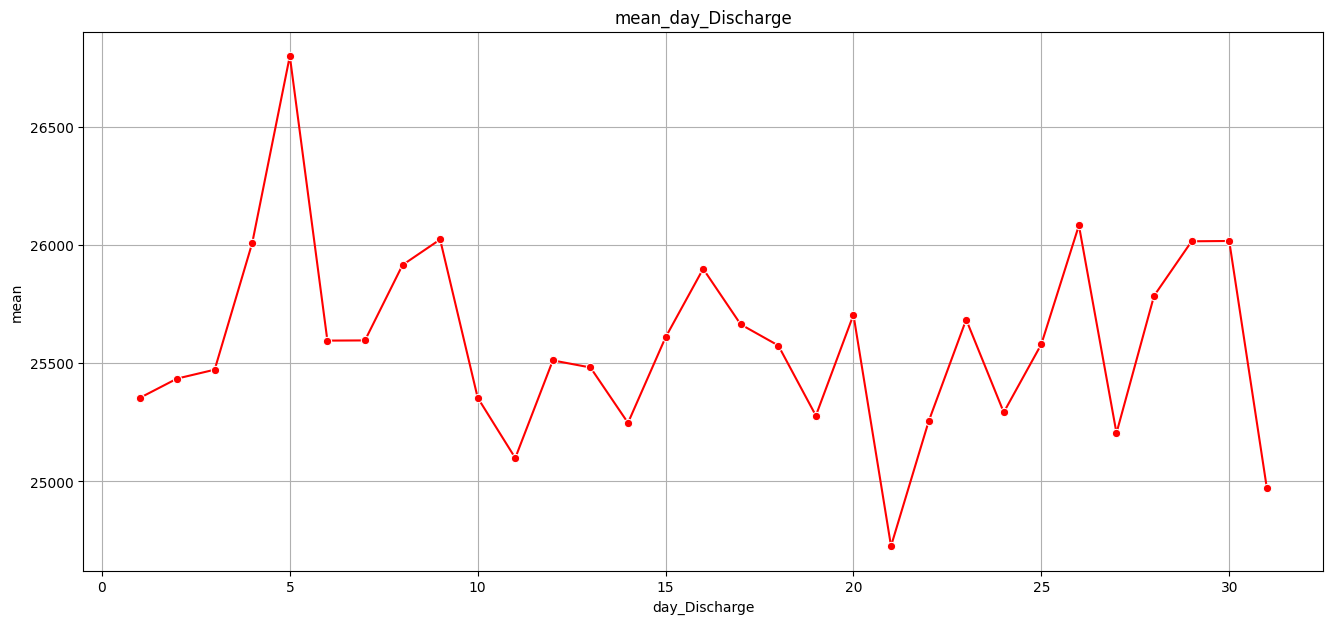

mean month_Discharge : 
                          mean           std
month_Discharge                            
9                25145.999486  14121.676301
4                25232.114234  14116.699842
1                25417.467177  14223.476010
8                25444.987166  14198.797106
5                25521.769021  13956.299650
6                25569.670817  14304.546975
3                25648.052261  14265.770119
2                25660.948107  14220.490803
12               25793.487501  14041.090423
7                25847.931505  14172.601782
11               25856.728944  14131.666326
10               25998.950737  14349.078910


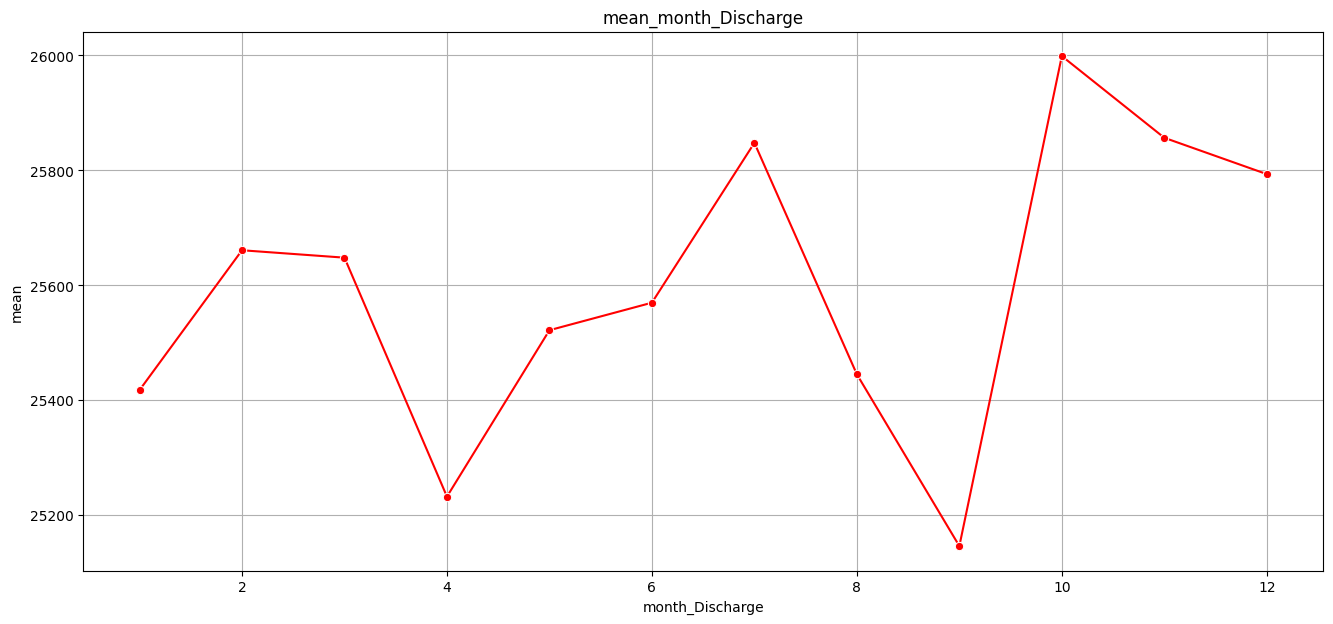

mean year_Discharge : 
                         mean           std
year_Discharge                            
2020            25402.047378  14184.847491
2024            25441.351425  14118.205944
2023            25586.574439  14147.728019
2022            25593.609302  14138.508371
2021            25729.055638  14279.663130
2019            25808.465055  14137.375905


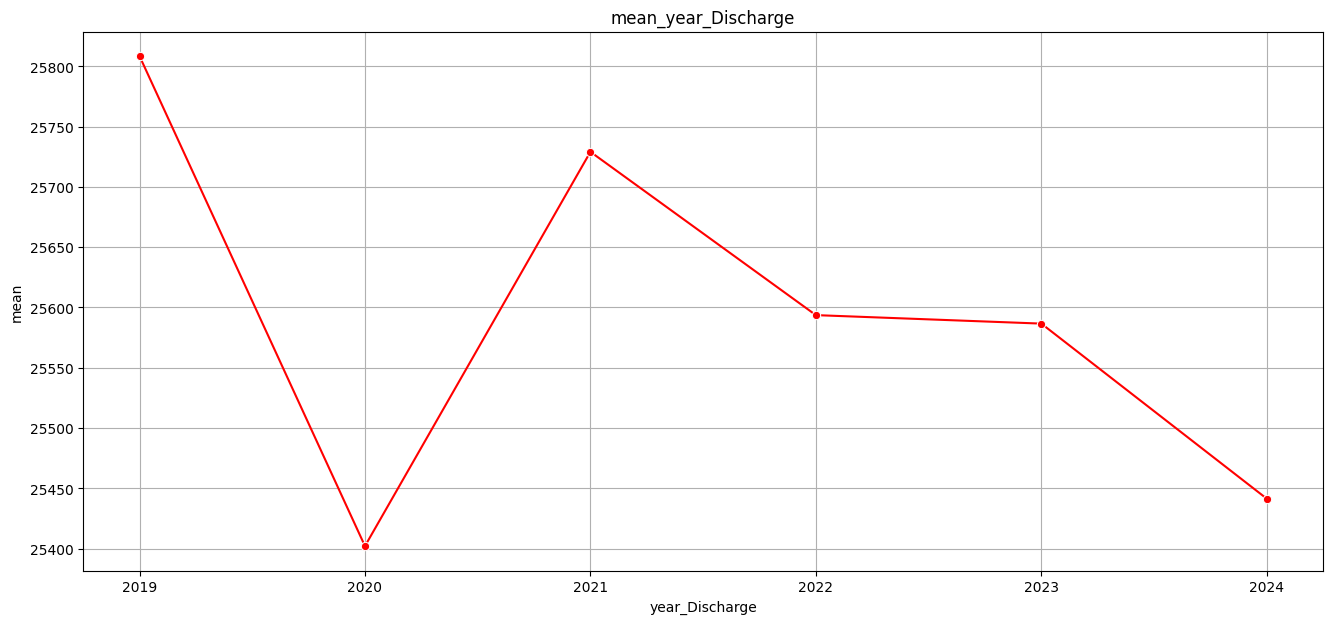

mean week_Discharge : 
                         mean           std
week_Discharge                            
Friday          25276.486075  14136.999079
Thursday        25450.846557  14226.402954
Saturday        25585.930899  13977.349754
Monday          25646.104434  14203.138539
Sunday          25657.109594  14244.140321
Tuesday         25769.007284  14129.059693
Wednesday       25785.226187  14307.884996


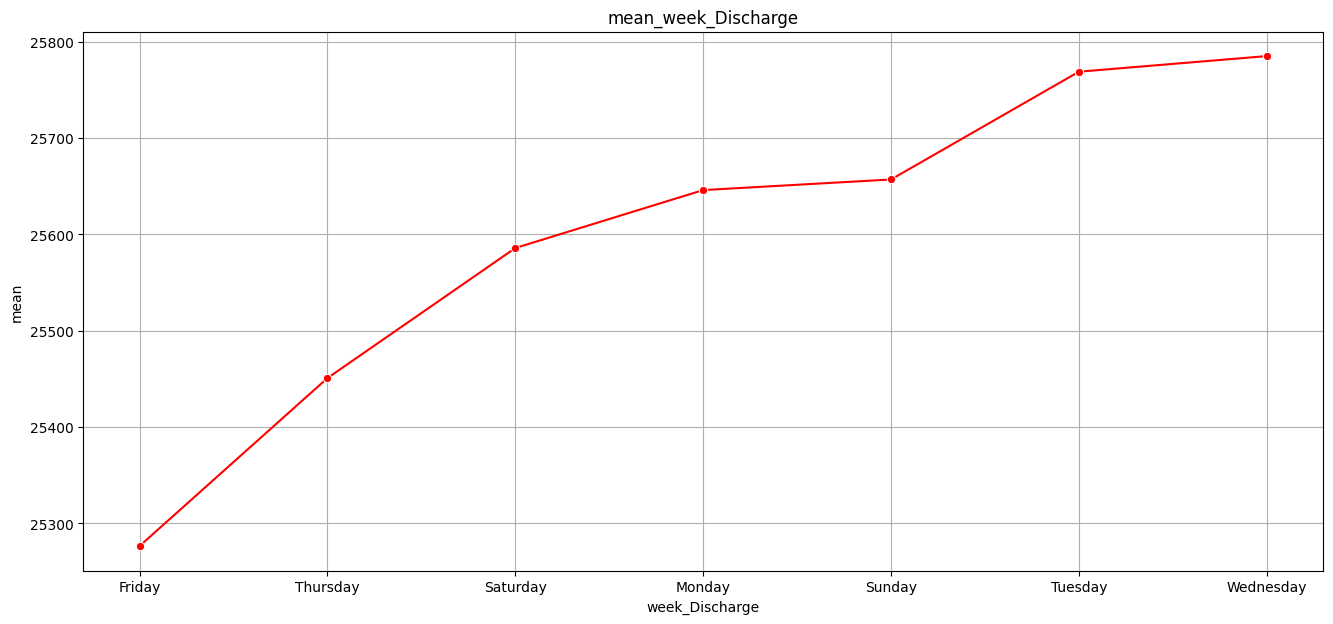

In [32]:
# a function to get the mean bill value per categroy
def mean_col(col):
    df = data.groupby(col)['Billing Amount'].agg(['mean' , 'std']).sort_values(by = 'mean')
    print(f'mean {col} : \n {df}')
    return df
# to plot a bar chart
for col in columns: 
    df2 = mean_col(col)
    plot_bar_chart(df2.index , df2['mean'] , 'mean' , f'mean_{col}')
# to plot a line chart
for col in columns_date:
    df3 = mean_col(col)
    line_plot_dubel(df3.index , df3['mean'] , 'mean' , f'mean_{col}')

- The mean billing amount for males (25,607.86) is slightly higher than females (25,470.65), but the difference is minimal.The standard deviations are similar, indicating comparable variability in billing amounts across genders.This suggests that gender is not a significant factor affecting the average billing amount in this dataset.
- Mean billing amounts vary slightly across medical conditions.The lowest mean billing was for Cancer patients (25,161.79), while the highest was for Obesity (25,805.97).Standard deviations are relatively close across conditions, indicating similar billing variability.Overall, there are no major differences in mean billing amounts between medical conditions.
- Mean billing amounts vary slightly between insurance providers.The highest mean billing amount was for Medicare (25,615.99), and the lowest for UnitedHealthcare (25,389.17).Standard deviations are fairly close, indicating similar billing variability across providers.Overall, there are no significant differences in mean billing amounts among the insurance providers.
- Mean billing amounts slightly increase from Emergency to Elective admission types.The highest mean billing amount was for Elective admissions at 25,602.23.Differences in means are small, and standard deviations are close, indicating similar billing variability across admission types.
- Mean billing amounts gradually increase with some medications, with the highest mean recorded for Ibuprofen.The lowest mean billing amount was for Lipitor.Standard deviations are similar, indicating comparable billing amount variability across different medications.Differences in means are relatively small.
- Mean billing amounts slightly increase from Normal to Inconclusive test results.The highest mean billing amount was recorded for Inconclusive results.Differences in means are small, and standard deviations are similar across the three groups, indicating comparable billing distribution regardless of test outcomes.
- There is variability in mean billing amounts across different days.The lowest mean billing amount was on day 21 (24,781.84).The highest mean billing amounts were recorded on days 6, 11, 15, and 22, exceeding 25,900.
- Mean billing amounts tend to be higher in late spring and summer months (June, July, October).Lower means are observed in early spring (March, April, May) and early fall (September).Differences between months are not very large but might reflect seasonal variations in case types or treatments.
- The highest mean billing amount was in 2019 compared to other years.From 2020 to 2024, there is a gradual increase in mean billing amounts with some fluctuations, with the lowest mean in 2024 and the highest in 2021.
- The mean billing amount tends to gradually increase from Sunday to Monday.The highest mean billing was observed on Monday, with Sunday having the lowest.Differences across weekdays are not very large, indicating relative stability in billing amounts throughout the week.
- The mean billing amount varies across different discharge days of the month.The highest mean billing amount was on the 5th day (around 26,786), noticeably higher than other days.The lowest mean billing was on the 21st day (around 24,682).Other days fluctuate around 25,000 to 26,000.
- The mean billing amount generally increases gradually from the beginning to the end of the year.The lowest mean billing was in September (month 9), around 25,098.The highest mean billing was in October (month 10), around 25,961.The standard deviation is relatively consistent across months, indicating similar variability in billing amounts throughout the year.
- There is a gradual increase in the mean billing amount from 2019 to 2021.The years 2019 and 2021 have the highest mean billing amounts.The standard deviation remains relatively consistent over the years, indicating similar variability in yearly billing costs.
- The mean billing amount is lowest on Friday compared to other weekdays.The highest mean billing amount is recorded on Tuesday.The standard deviation is relatively consistent, indicating similar variability in daily billing costs.

Gender VS Medical Condition : 
 Medical Condition  Arthritis  Asthma  Cancer  Diabetes  Hypertension  Obesity
Gender                                                                       
Female                  4636    4498    4556      4599          4559     4563
Male                    4571    4579    4565      4598          4572     4564


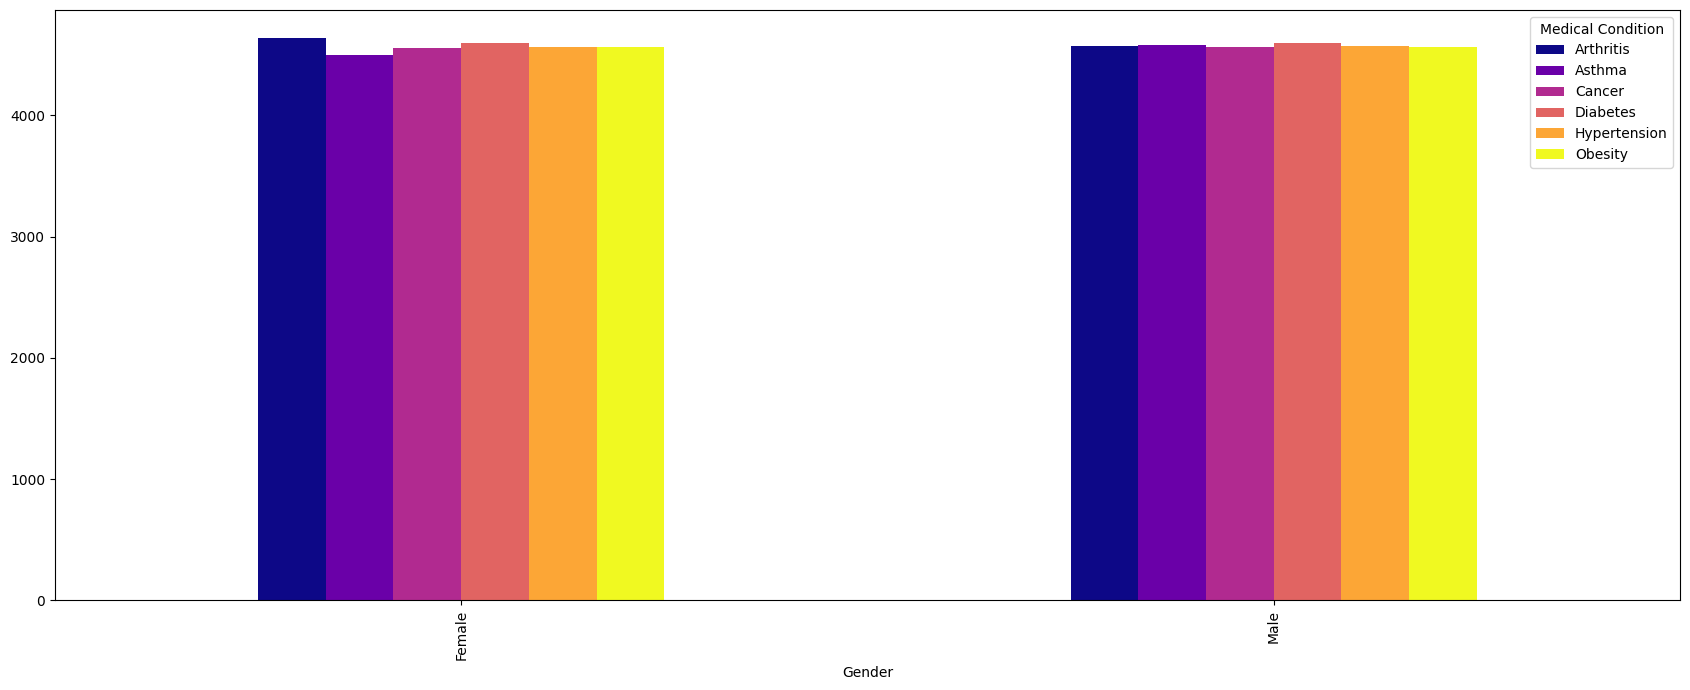

Gender VS Insurance Provider : 
 Insurance Provider  Aetna  Blue Cross  Cigna  Medicare  UnitedHealthcare
Gender                                                                  
Female               5313        5506   5580      5516              5496
Male                 5482        5431   5535      5502              5499


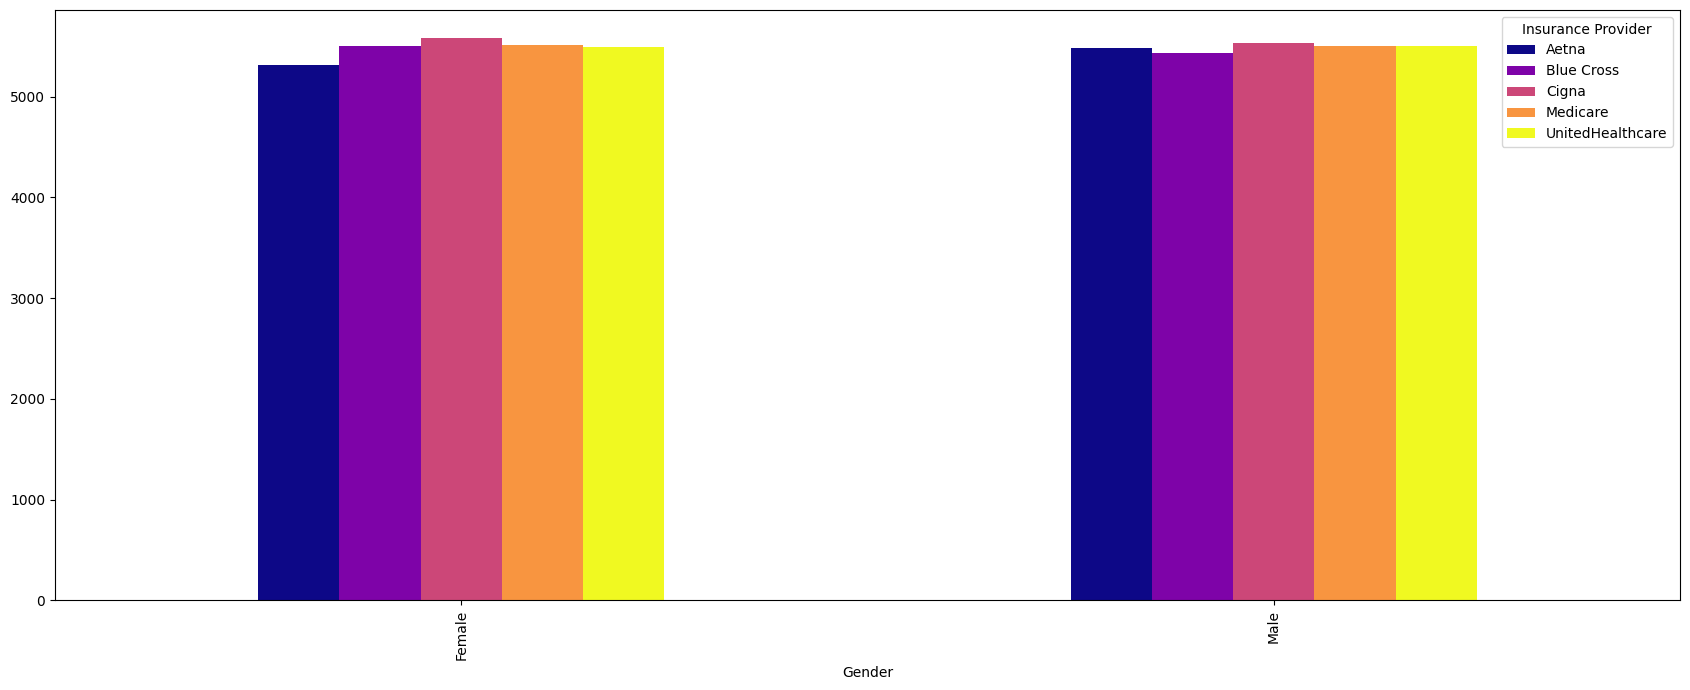

Gender VS Admission Type : 
 Admission Type  Elective  Emergency  Urgent
Gender                                     
Female              9265       9145    9001
Male                9172       8925    9352


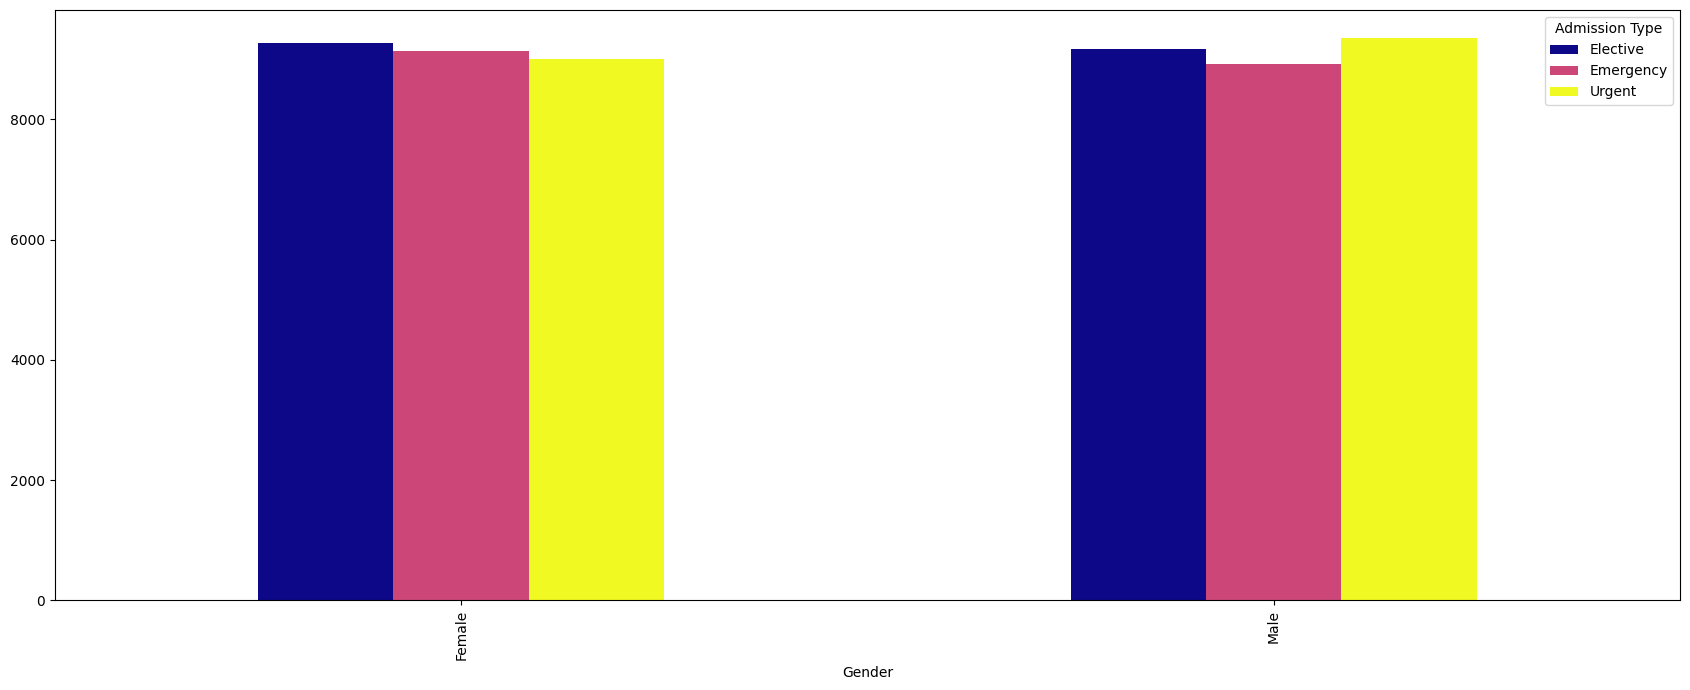

Gender VS Medication : 
 Medication  Aspirin  Ibuprofen  Lipitor  Paracetamol  Penicillin
Gender                                                          
Female         5557       5535     5487         5377        5455
Male           5406       5467     5531         5568        5477


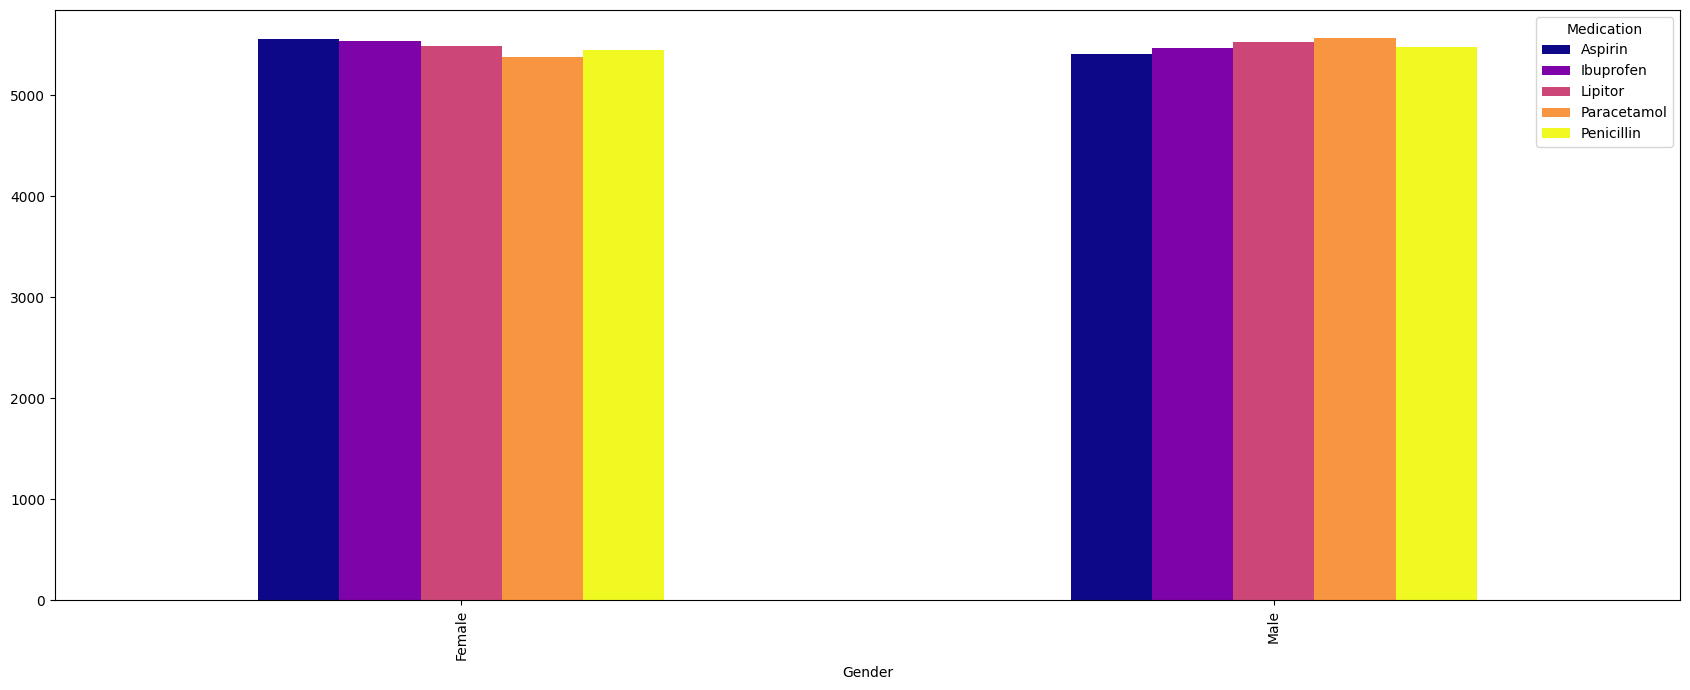

Gender VS Test Results : 
 Test Results  Abnormal  Inconclusive  Normal
Gender                                      
Female            9225          9124    9062
Male              9174          9035    9240


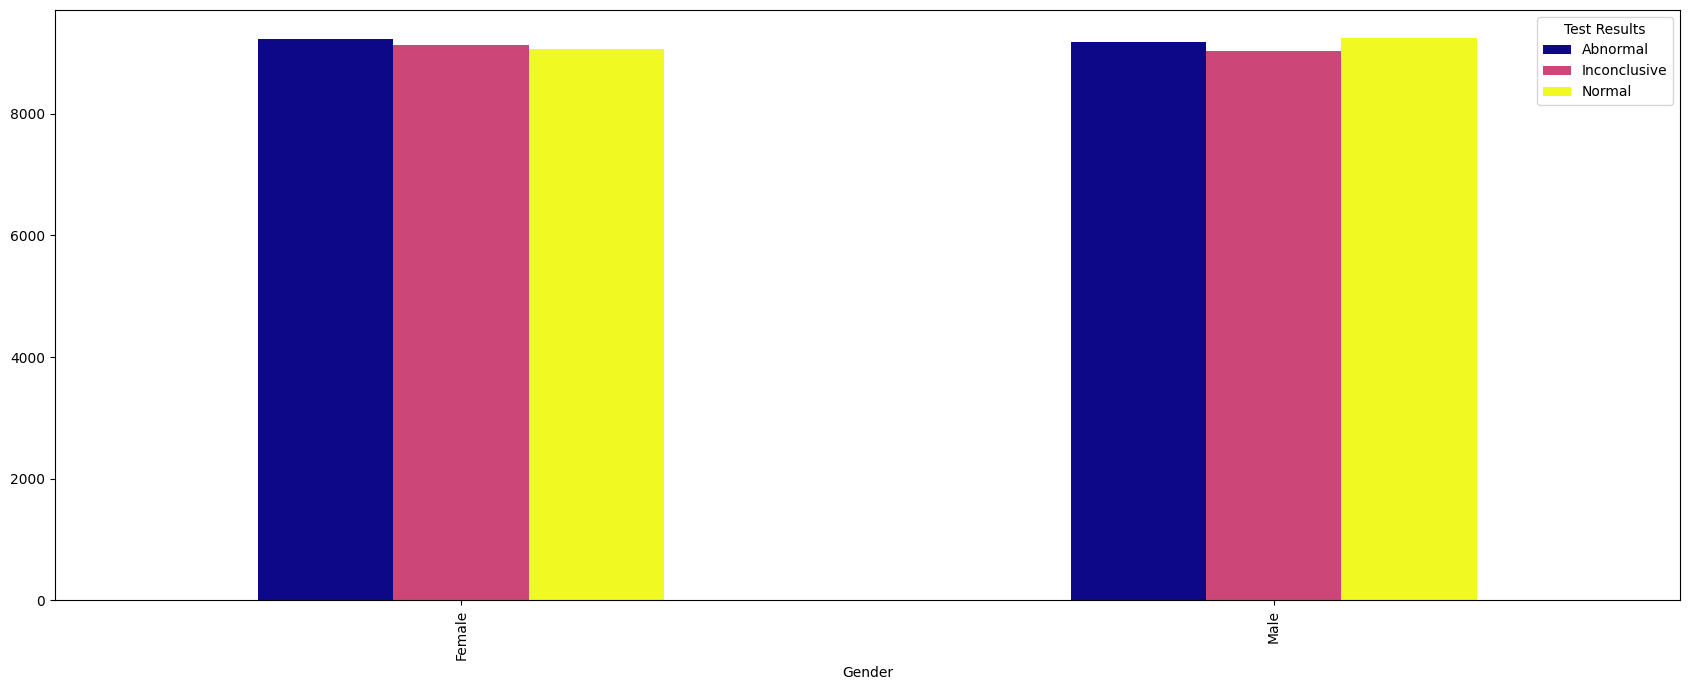

Medical Condition VS Blood Type : 
 Blood Type           A+    A-   AB+   AB-    B+    B-    O+    O-
Medical Condition                                                
Arthritis          1106  1143  1123  1177  1190  1150  1185  1133
Asthma             1121  1156  1173  1120  1103  1106  1161  1137
Cancer             1169  1119  1099  1182  1186  1130  1096  1140
Diabetes           1198  1153  1163  1130  1178  1133  1139  1103
Hypertension       1118  1185  1202  1106  1083  1161  1144  1132
Obesity            1167  1126  1112  1144  1136  1181  1118  1143


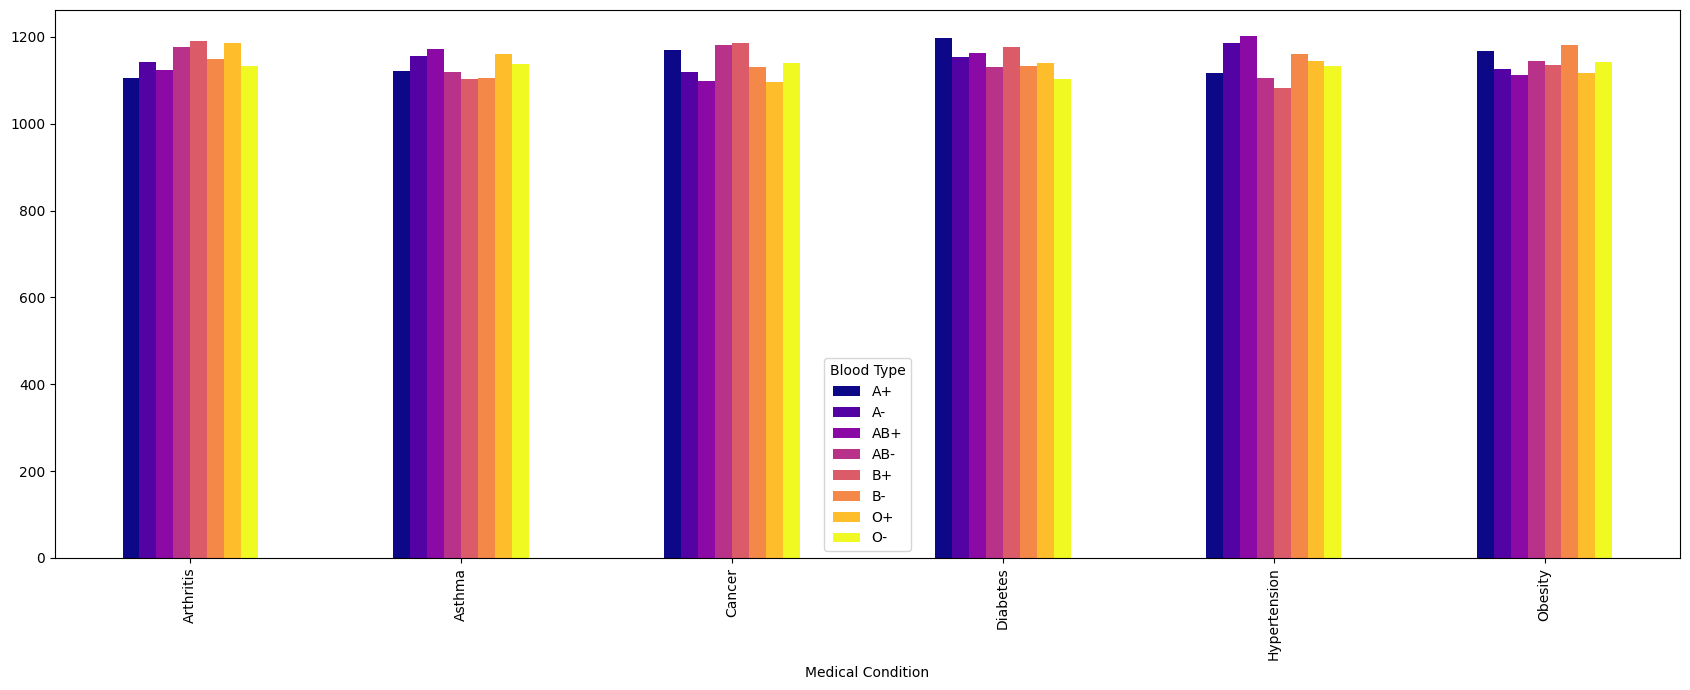

Medical Condition VS Medication : 
 Medication         Aspirin  Ibuprofen  Lipitor  Paracetamol  Penicillin
Medical Condition                                                      
Arthritis             1900       1804     1808         1855        1840
Asthma                1777       1799     1809         1868        1824
Cancer                1766       1853     1902         1827        1773
Diabetes              1832       1844     1871         1791        1859
Hypertension          1840       1869     1818         1837        1767
Obesity               1848       1833     1810         1767        1869


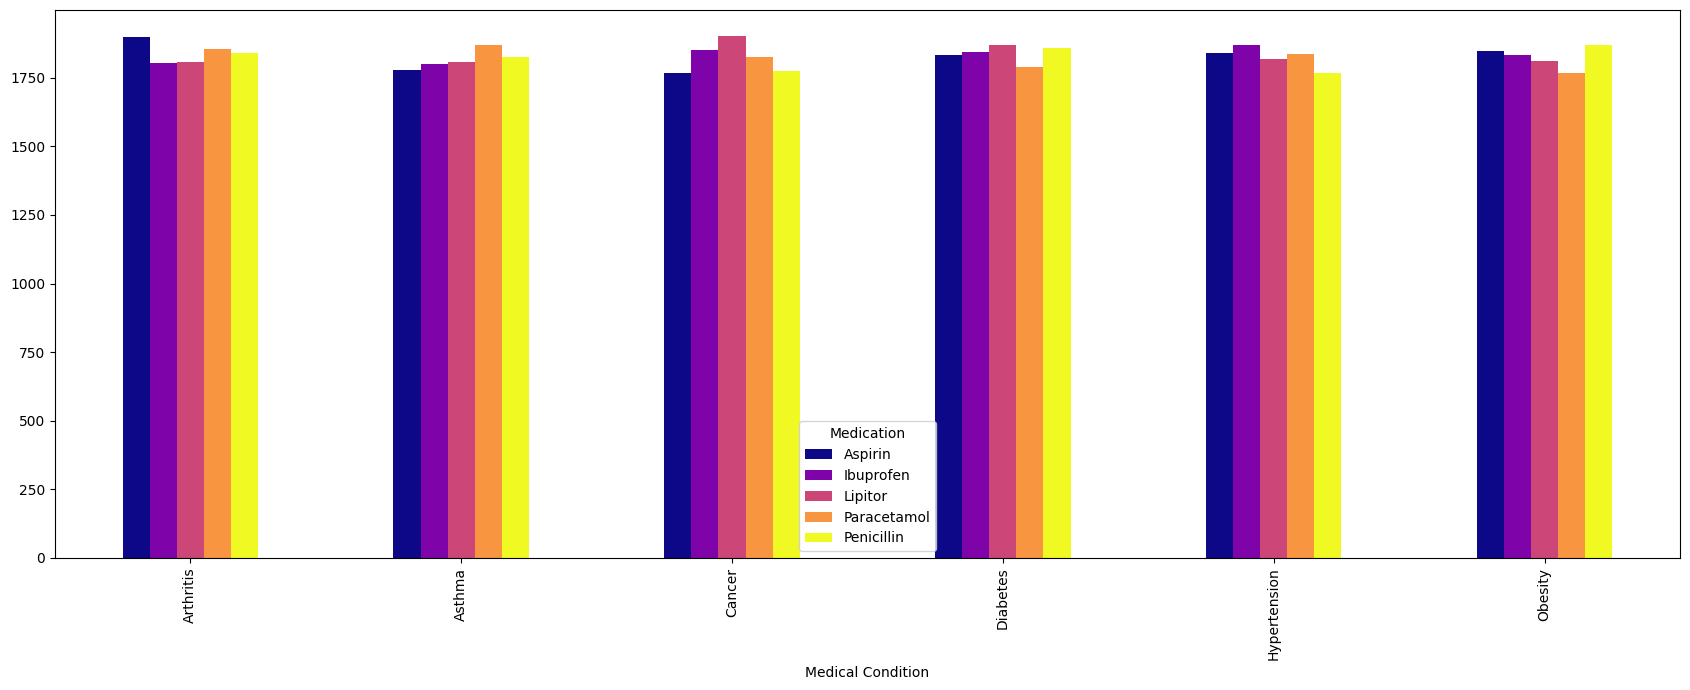

Medical Condition VS Test Results : 
 Test Results       Abnormal  Inconclusive  Normal
Medical Condition                                
Arthritis              3153          3061    2993
Asthma                 2972          2992    3113
Cancer                 3081          3029    3011
Diabetes               3124          3014    3059
Hypertension           2970          3060    3101
Obesity                3099          3003    3025


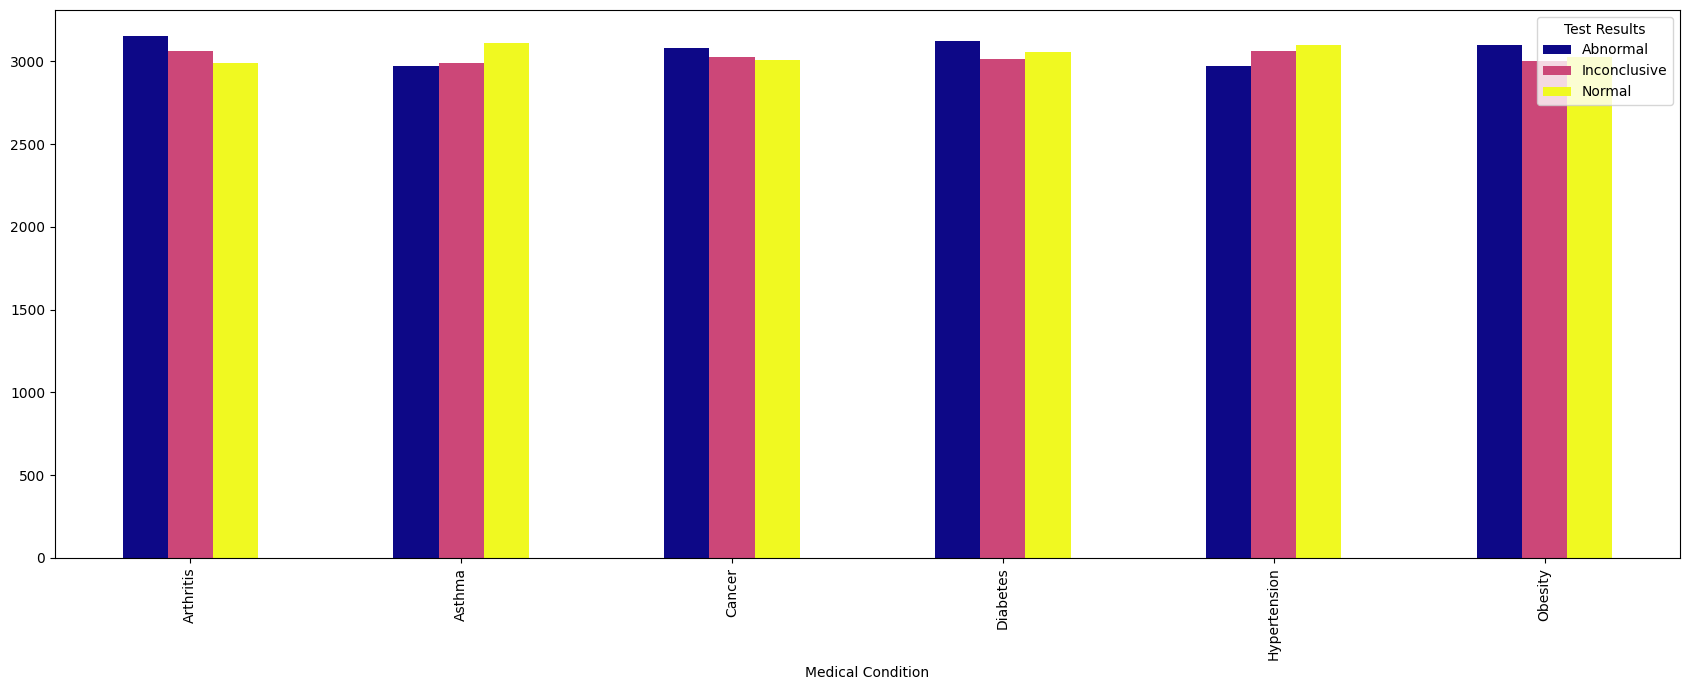

Medical Condition VS Admission Type : 
 Admission Type     Elective  Emergency  Urgent
Medical Condition                             
Arthritis              3058       3070    3079
Asthma                 3064       2973    3040
Cancer                 3108       2983    3030
Diabetes               3027       2982    3188
Hypertension           3171       2970    2990
Obesity                3009       3092    3026


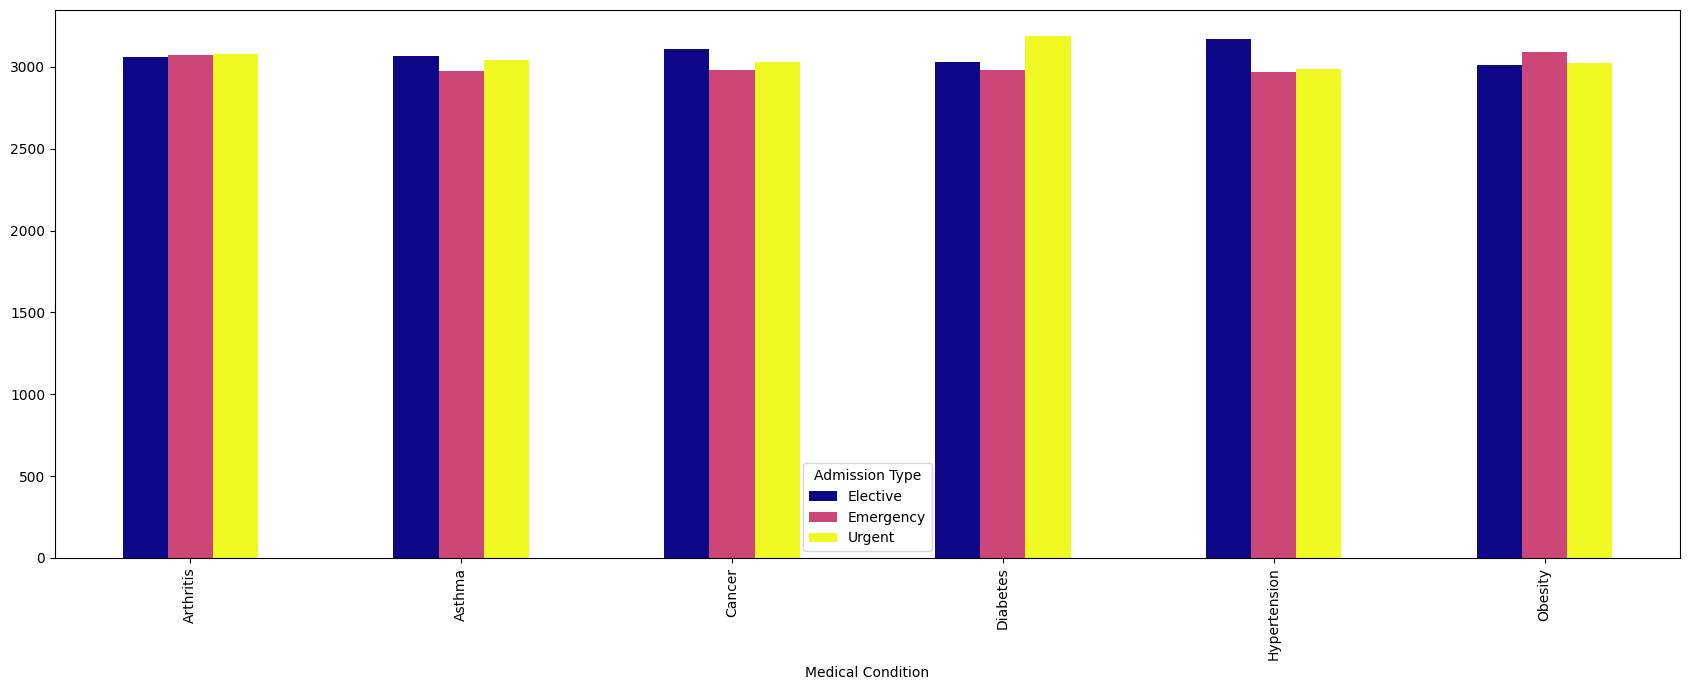

Admission Type VS Test Results : 
 Test Results    Abnormal  Inconclusive  Normal
Admission Type                                
Elective            6220          6039    6178
Emergency           6029          6005    6036
Urgent              6150          6115    6088


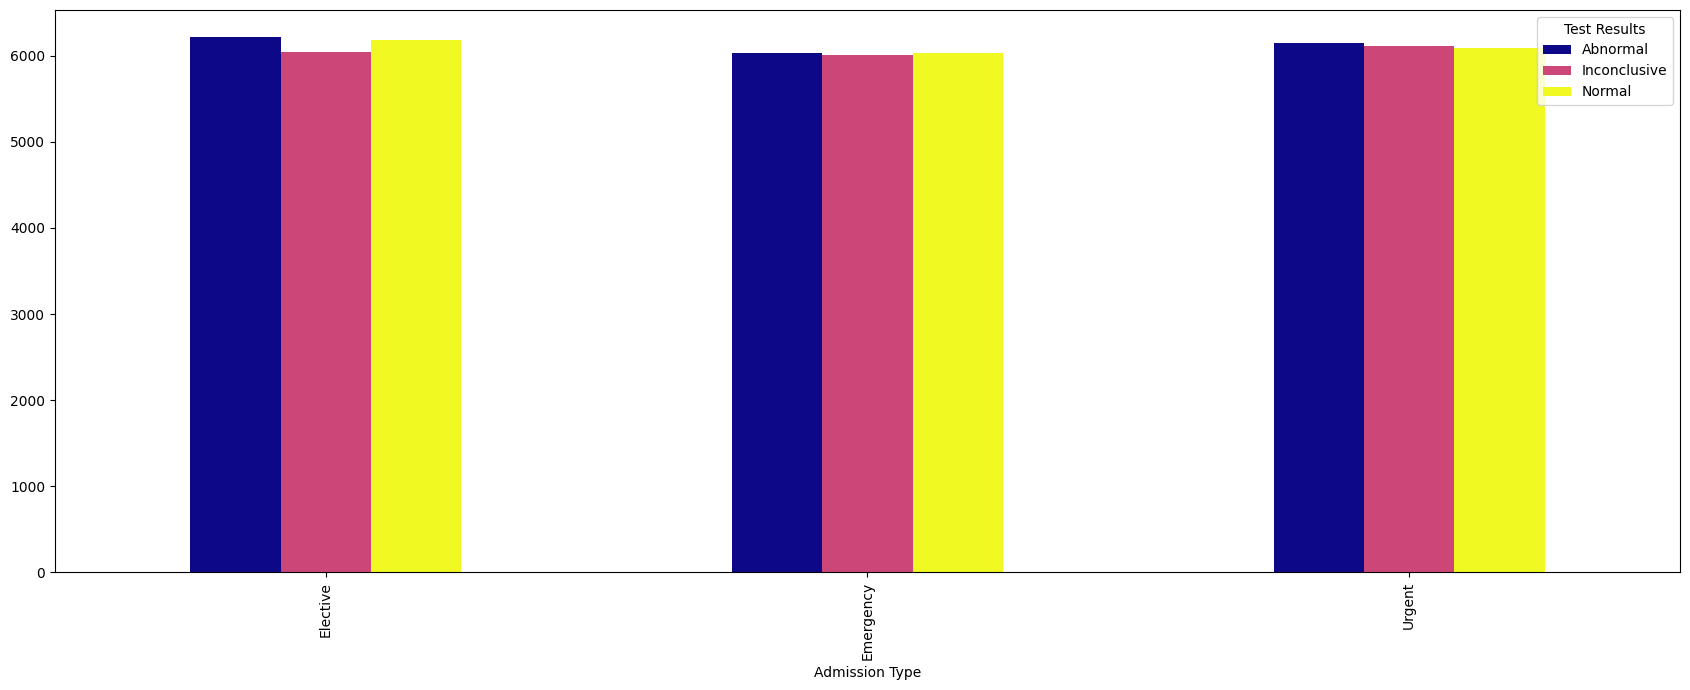

Admission Type VS Blood Type : 
 Blood Type        A+    A-   AB+   AB-    B+    B-    O+    O-
Admission Type                                                
Elective        2320  2310  2270  2358  2218  2301  2303  2357
Emergency       2264  2246  2273  2239  2339  2235  2280  2194
Urgent          2295  2326  2329  2262  2319  2325  2260  2237


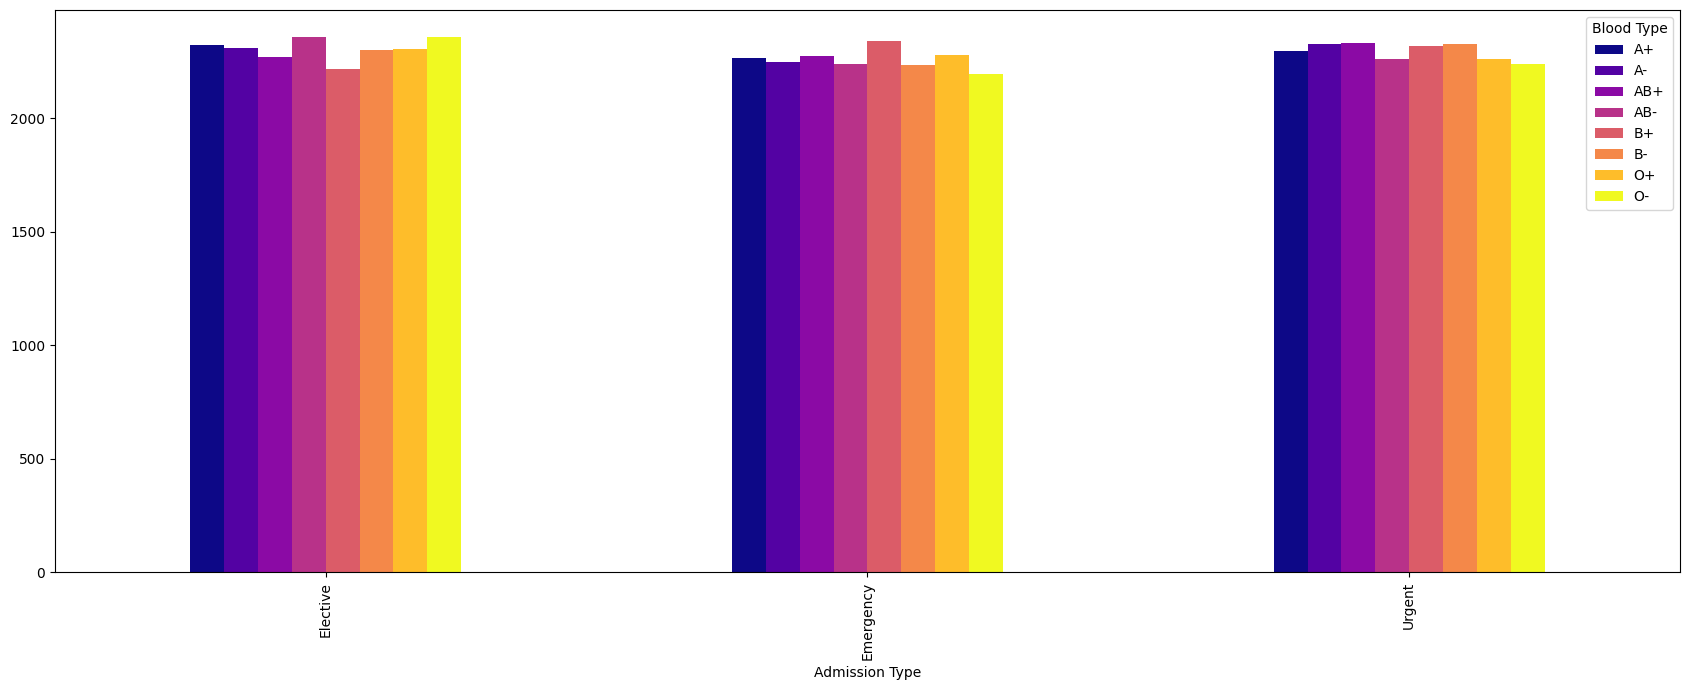

In [27]:
column = ['Medical Condition' , 'Insurance Provider' , 'Admission Type' , 'Medication' , 'Test Results']
column2 = ['Blood Type','Medication' , 'Test Results' ,'Admission Type']
column3 = ['Test Results' , 'Blood Type']
# a function to comppare the columns
def comparison(col1 , col2):
    cro_df = pd.crosstab(data[col1], data[col2])
    print(f'{col1} VS {col2} : \n {cro_df}')
    cro_df.plot(kind= 'bar' , cmap = 'plasma' , figsize=(17,7))
    plt.tight_layout()
    plt.show()
# compare columns by 'Gender'
for col in column:
    comparison('Gender' , col)
# compare columns by 'Medical Condition'
for col in column2:
    comparison('Medical Condition' , col)
# compare columns by 'Admission Type'
for col in column3:
    comparison('Admission Type' , col)

- The counts between males and females are quite close across most medical conditions.Males have slightly higher numbers in Asthma, Diabetes, and Hypertension.Arthritis cases are slightly higher in females.Overall, the distribution between genders is relatively balanced for each medical condition.

- The distribution between males and females is quite close across most insurance providers.Females have slightly higher counts in Blue Cross and Cigna.Males have slightly higher counts in Aetna, UnitedHealthcare, and Medicare.Overall, there are no significant gender differences regarding insurance providers.

- Females have a slightly higher count in Elective and Emergency admissions.Males have a higher count in Urgent admissions.The differences between genders are small, indicating a relative balance in admission types.

- Females and males have very close numbers in taking Aspirin, Ibuprofen, Lipitor, and Penicillin.Males have slightly higher numbers in Paracetamol and Lipitor usage.

- The numbers are very close between females and males across the three categories.Males have a slightly higher count in Normal test results.Females have slightly higher counts in Abnormal and Inconclusive results.Overall, there are no significant differences between genders in test outcomes.

- No clear differences in distribution between medical conditions by blood type.Most medical conditions are fairly evenly distributed across all blood types.Blood types B+ and O+ show slightly higher counts in some conditions such as Arthritis and Diabetes.

- Aspirin is most commonly used among Arthritis patients.Lipitor usage is higher among Cancer and Diabetes patients.Penicillin shows relatively higher use in Obesity and Diabetes patients.Overall, the distribution of medication use is relatively balanced across medical conditions.

- The percentage of abnormal test results is relatively close among medical conditions, with a slight predominance in Arthritis and Diabetes patients.Conditions such as Asthma and Hypertension tend to have slightly higher rates of normal test results.The distribution of inconclusive results is quite similar across all medical conditions.

- Admission types are distributed fairly evenly across most medical conditions.Diabetes shows a relatively higher proportion of urgent admissions.Obesity and arthritis show slightly higher numbers in emergency admissions.Elective admissions are roughly equal across conditions, with a slight increase in hypertension and cancer cases.

- The differences in test result distributions across admission types are minor, suggesting consistency in diagnostic outcomes.Elective admissions recorded the highest number of abnormal test results.Urgent admissions showed the highest count of inconclusive results, potentially indicating more complex or uncertain cases.Normal test results are fairly evenly distributed among all admission types.

- Overall, blood type distribution is relatively balanced across all admission types.Elective admissions have slightly higher counts of blood types like AB- and O-.Emergency admissions show slightly lower values for A- and O-, suggesting fewer patients with these blood types entered through emergency.Urgent admissions show the highest counts for AB+ and B-, which might reflect patterns in specific medical conditions.

Hospital
LLC Smith        44
Ltd Smith        39
Johnson PLC      37
Smith Ltd        37
Smith PLC        36
Smith Group      34
Smith Inc        33
Johnson Inc      32
Group Smith      32
Smith LLC        32
LLC Johnson      30
PLC Williams     30
PLC Smith        29
Brown Inc        28
Johnson Group    27
Inc Brown        27
Inc Smith        27
Group Johnson    26
Inc Johnson      26
Inc Jones        25
Name: count, dtype: int64


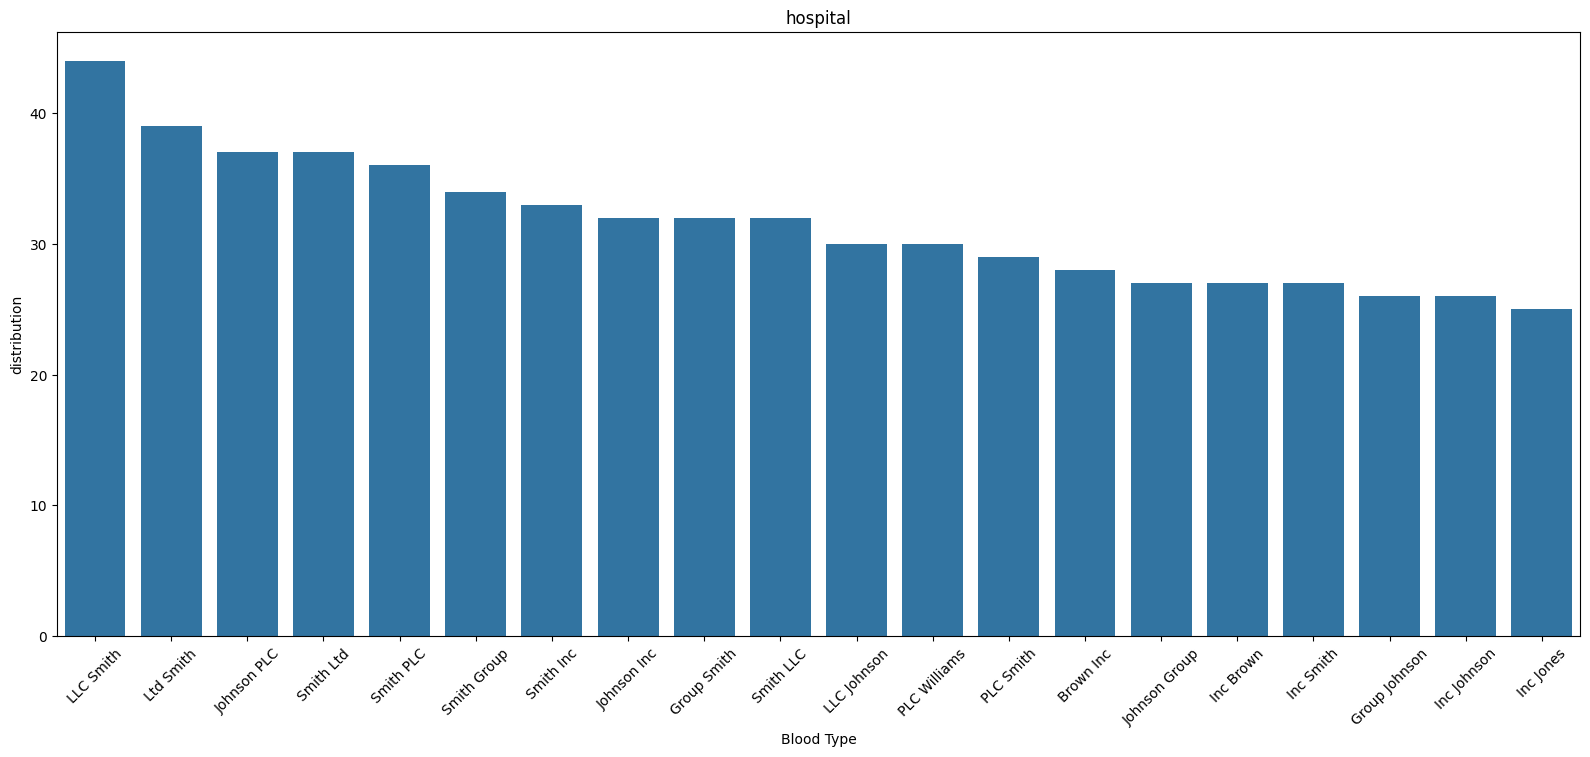

Hospital
Hernandez-Morton                  52373.032374
Walker-Garcia                     52170.036854
Ruiz-Anthony                      52154.237722
George-Gonzalez                   52102.240889
Rocha-Carter                      52092.669896
Briggs Walker Martinez, and       52024.726443
and Small Stephens Harrington,    51975.968135
Clark-Espinoza                    51848.201597
Pierce and Miller James,          51722.122739
Stephens Ltd                      51714.300871
Lester-Park                       51661.012033
Stein-Watts                       51634.099835
Thomas, Clark and Keith           51633.858435
Baker, Weber Patton and           51587.936817
Bowman-Jimenez                    51567.277671
Perez-Wagner                      51531.964563
Brewer-Washington                 51415.257872
Cabrera-Baker                     51350.512806
Santiago and Russo, Wood          51336.221210
Group Glover                      51316.621256
Name: Billing Amount, dtype: float64


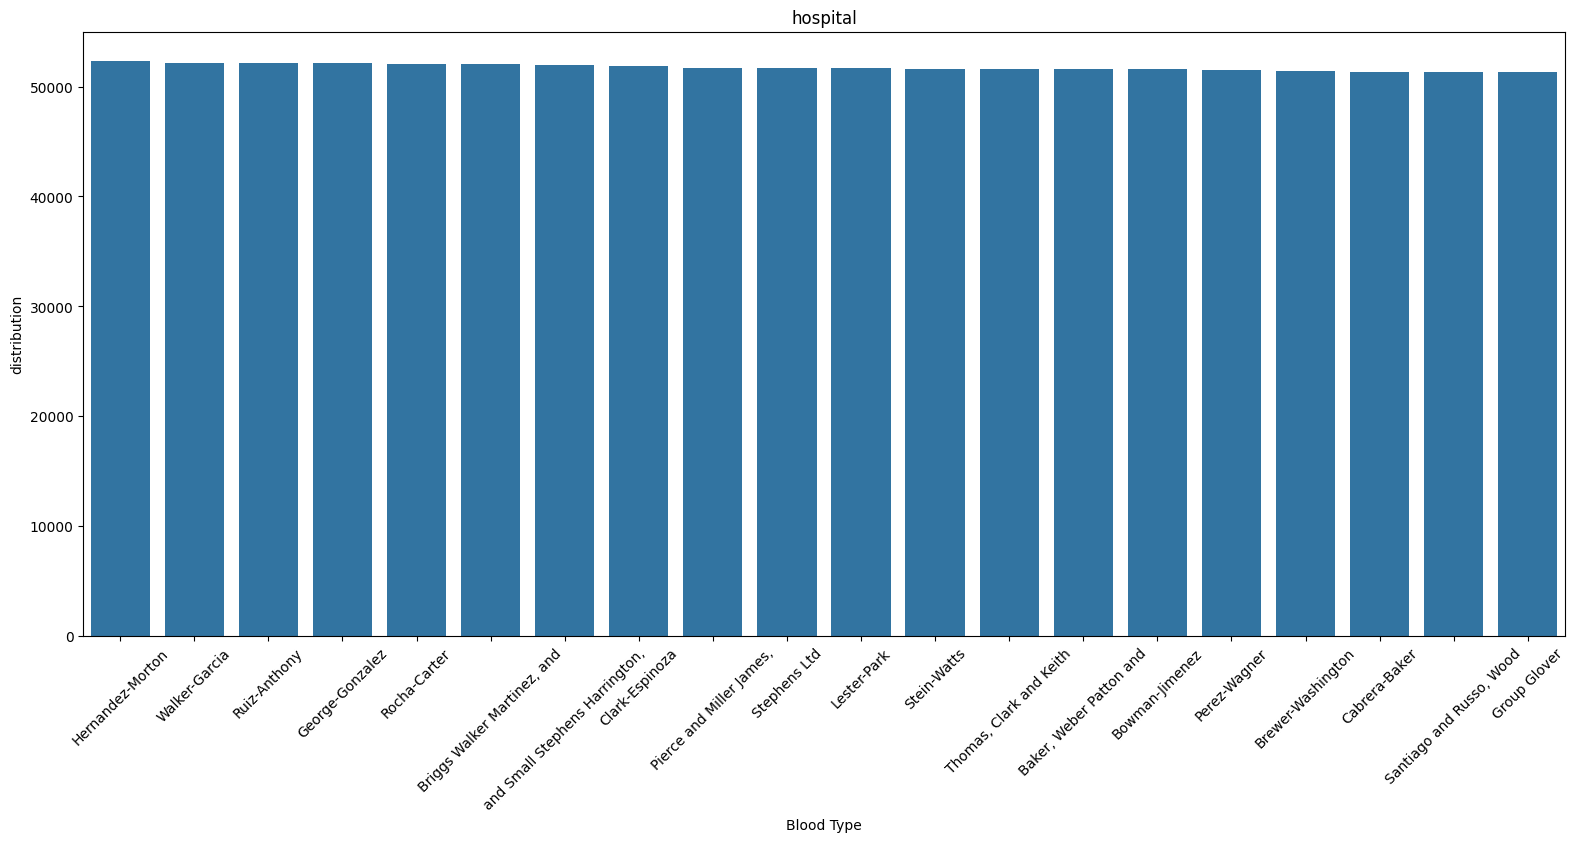

Hospital
Cooper Brown Parks, and        87.0
Gray-Solomon                   87.0
Holmes and Howard Castro,      87.0
Moore-Gray                     87.0
and Martin, Davidson Cox       87.0
and Miller, Olson Olson        87.0
and Perez, Bennett Townsend    87.0
Bates Gomez, and Larson        86.5
Calderon and Sons              86.5
Chaney, Cook Tyler and         86.5
Jones Welch and Schmidt,       86.5
Mitchell-Berg                  86.5
Morales-Anderson               86.5
Poole Shannon, and Robles      86.5
Sons and Johnston              86.5
and Hernandez Willis, Burke    86.5
Boone Allen, Ortiz and         86.0
Brooks-Martinez                86.0
Byrd-Porter                    86.0
Cain and Gay Thomas,           86.0
Name: Age, dtype: float64


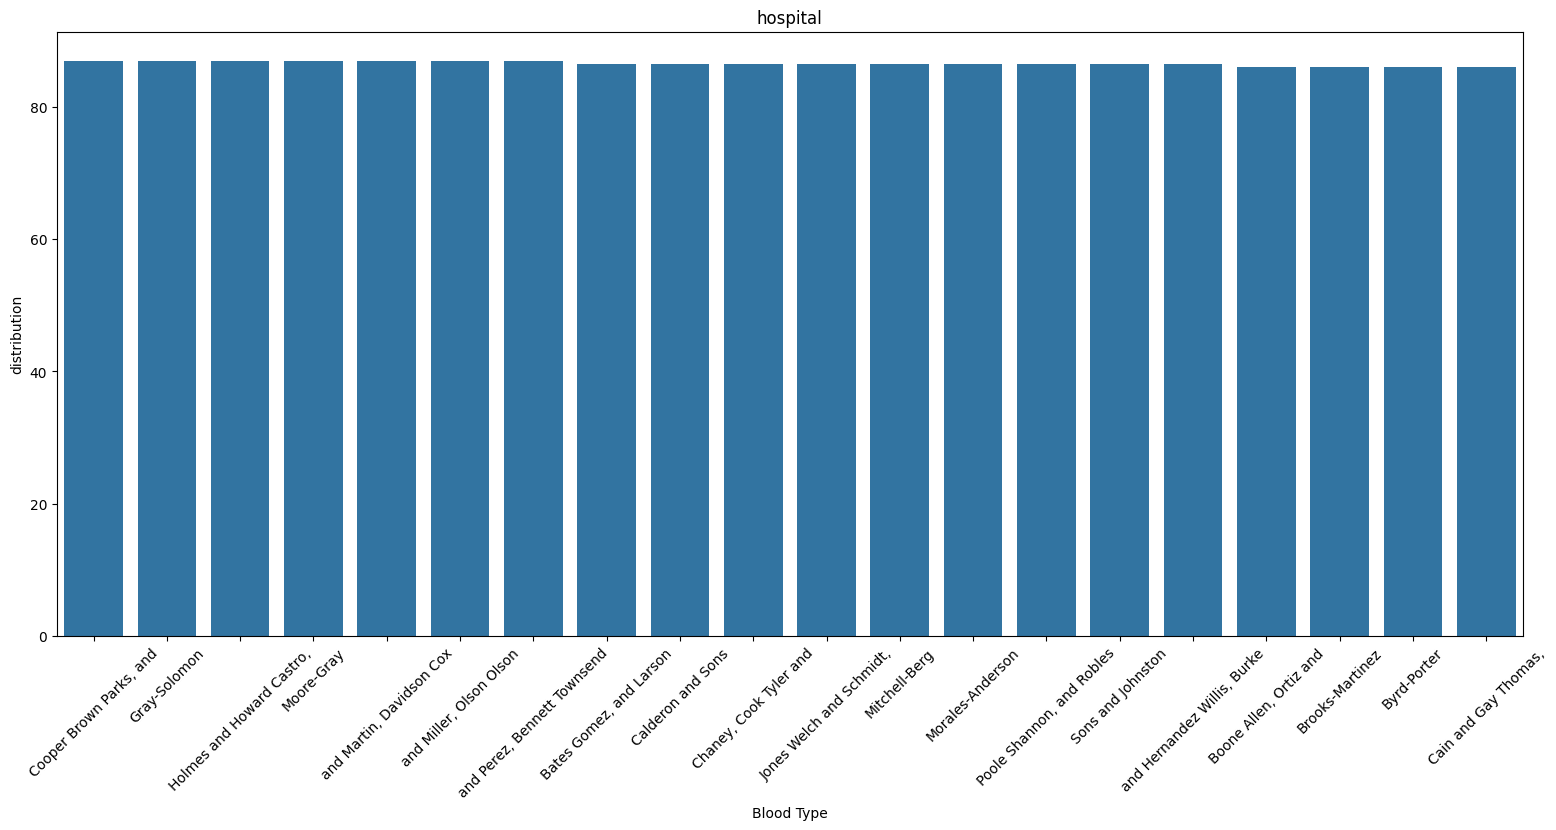

In [28]:

data_hospital = data['Hospital'].value_counts().nlargest(20)
mean_hospital = data.groupby('Hospital')['Billing Amount'].mean().nlargest(20)
med_hospital = data.groupby('Hospital')['Age'].median().nlargest(20)
var_data_col = [data_hospital , mean_hospital , med_hospital]
for var in var_data_col:
    print(var)
    plot_bar_chart(var.index , var.values ,'distribution' ,'hospital')


- The name "Smith" appears in most of the top hospitals, indicating a large medical network under that name.Similarly, "Johnson" is also a common hospital name in the top list, reflecting a wide-reaching healthcare brand.No single hospital dominates overwhelmingly, suggesting a fairly balanced distribution of patients across institutions.

- All hospitals listed have billing averages above 51,000.Indicates possibly more complex or high-cost services.

- All listed hospitals have an average patient age above 86 years.This could indicate a focus on geriatric care or chronic condition management.